# **The Neural Grid: Deep Learning for Smart Electricity Pricing**

In an era where energy markets fluctuate unpredictably, accurate electricity price forecasting is more crucial than ever. Driven by a dynamic interplay of supply, demand, weather conditions, electricity prices exhibit complex patterns that challenge traditional forecasting methods.

For this project, I have used data from https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather/data .It comprises of 4 years of electrical consumption, generation, pricing, and weather data for Spain.

In [ ]:
The motivation behind carrying out this project was to employ deep learning nueral architectures to make a better day-ahead electricity price prediction than a Spanish TSO(Transmission System Operator) did, which was responsible for maintaining the electric grid.

## Data Cleaning and Exploration

In [1]:
import pandas as pd
import numpy as np
## importing the energy consumption dataset and weather features dataset
df1 = pd.read_csv("/content/energy_dataset.csv",parse_dates=['time'])
df2 = pd.read_csv("/content/weather_features.csv",parse_dates=['dt_iso'])

In [2]:
# check for null values in energy data
df1.isnull().sum()

,0
time,0
generation biomass,19
generation fossil brown coal/lignite,18
generation fossil coal-derived gas,18
generation fossil gas,18
generation fossil hard coal,18
generation fossil oil,19
generation fossil oil shale,18
generation fossil peat,18
generation geothermal,18


In [3]:
#checking value counts for all features in energy data
for col in df1.columns:
    print(f"Value counts for '{col}':\n{df1[col].value_counts(),}\n")

Value counts for 'time':
(time
2018-12-31 23:00:00+01:00    1
2015-01-01 00:00:00+01:00    1
2015-01-01 01:00:00+01:00    1
2015-01-01 02:00:00+01:00    1
2015-01-01 03:00:00+01:00    1
                            ..
2015-01-02 03:00:00+01:00    1
2015-01-02 04:00:00+01:00    1
2015-01-02 05:00:00+01:00    1
2015-01-02 06:00:00+01:00    1
2015-01-02 07:00:00+01:00    1
Name: count, Length: 35064, dtype: int64,)

Value counts for 'generation biomass':
(generation biomass
361.0    321
362.0    318
351.0    310
359.0    305
358.0    305
        ... 
175.0      1
168.0      1
589.0      1
177.0      1
101.0      1
Name: count, Length: 423, dtype: int64,)

Value counts for 'generation fossil brown coal/lignite':
(generation fossil brown coal/lignite
0.0      10517
663.0      165
664.0      124
595.0      108
657.0      103
         ...  
43.0         1
87.0         1
41.0         1
13.0         1
44.0         1
Name: count, Length: 956, dtype: int64,)

Value counts for 'generation fossil co

In [4]:
pd.set_option('display.max_columns', None)
df1.head(50)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
5,2015-01-01 05:00:00+01:00,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,NaN,2109.0,952.0,743.0,0.0,7098.0,43.0,74.0,34.0,188.0,0.0,4618.0,4.0,NaN,4617.0,21441.0,19905.0,35.72,53.63
6,2015-01-01 06:00:00+01:00,401.0,172.0,0.0,4040.0,3368.0,158.0,0.0,0.0,0.0,NaN,2108.0,961.0,848.0,0.0,7098.0,43.0,74.0,34.0,186.0,0.0,4397.0,3.0,NaN,4276.0,21285.0,20010.0,35.13,51.73
7,2015-01-01 07:00:00+01:00,408.0,172.0,0.0,4030.0,3208.0,160.0,0.0,0.0,0.0,NaN,2031.0,983.0,1012.0,0.0,7099.0,43.0,72.0,35.0,189.0,0.0,3992.0,12.0,NaN,3994.0,21545.0,20377.0,36.22,51.43
8,2015-01-01 08:00:00+01:00,413.0,177.0,0.0,4052.0,3335.0,161.0,0.0,0.0,0.0,NaN,2119.0,1001.0,1015.0,0.0,7098.0,43.0,73.0,54.0,198.0,0.0,3629.0,39.0,NaN,3602.0,21443.0,20094.0,32.40,48.98
9,2015-01-01 09:00:00+01:00,419.0,177.0,0.0,4137.0,3437.0,163.0,0.0,0.0,0.0,NaN,2170.0,1041.0,1357.0,0.0,7097.0,43.0,74.0,743.0,198.0,0.0,3073.0,784.0,NaN,3212.0,21560.0,20637.0,36.60,54.20


In [5]:
df1.shape #35064 timestamps and 29 features (including timestamp column)

(35064, 29)

In [6]:
# dropping useless features which only have one kind of value(nan or 0.0)
df1 = df1.drop(['generation hydro pumped storage aggregated','forecast wind offshore eday ahead','generation fossil coal-derived gas','generation fossil oil shale', 'generation fossil peat',
       'generation geothermal','generation marine','generation wind offshore'],axis=1)

In [7]:
df1.isnull().sum()

,0
time,0
generation biomass,19
generation fossil brown coal/lignite,18
generation fossil gas,18
generation fossil hard coal,18
generation fossil oil,19
generation hydro pumped storage consumption,19
generation hydro run-of-river and poundage,19
generation hydro water reservoir,18
generation nuclear,17


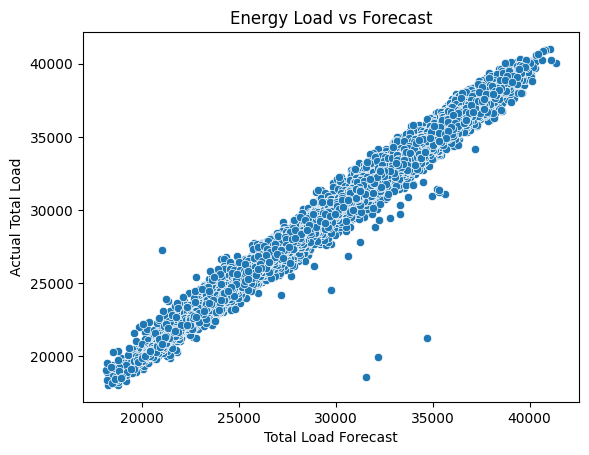

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# graphically checking for correlation between measured and predicted loads
sns.scatterplot(x=df1['total load forecast'], y=df1['total load actual'])
plt.xlabel('Total Load Forecast')
plt.ylabel('Actual Total Load')
plt.title('Energy Load vs Forecast')
plt.show()


In [9]:
## high positive correlation so I can fit a linear regression model to predict unknown actual load values
# Select feature and target
feature = 'total load forecast'
target = 'total load actual'

# Split into known and missing values
df_known = df1[df1[target].notna()]
df_missing = df1[df1[target].isna()]

from sklearn.linear_model import LinearRegression

# Prepare training data
X_train = df_known[[feature]]  # Predictor feature
y_train = df_known[target]  # Target variable

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict missing values
X_missing = df_missing[[feature]]
df1.loc[df1[target].isna(), target] = model.predict(X_missing)


In [10]:
# Fill null values using interpolation (I can't drop the indices because this is a forecasting problem)

df1.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

<ipython-input-10-7d7c69f6b6b0>:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df1.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)


In [11]:
for col in df1.columns:
    print(f"Value counts for '{col}':\n{df1[col].value_counts(),}\n")

Value counts for 'time':
(time
2018-12-31 23:00:00+01:00    1
2015-01-01 00:00:00+01:00    1
2015-01-01 01:00:00+01:00    1
2015-01-01 02:00:00+01:00    1
2015-01-01 03:00:00+01:00    1
                            ..
2015-01-02 03:00:00+01:00    1
2015-01-02 04:00:00+01:00    1
2015-01-02 05:00:00+01:00    1
2015-01-02 06:00:00+01:00    1
2015-01-02 07:00:00+01:00    1
Name: count, Length: 35064, dtype: int64,)

Value counts for 'generation biomass':
(generation biomass
361.000000    321
362.000000    318
351.000000    310
359.000000    305
358.000000    305
             ... 
375.142857      1
101.000000      1
371.714286      1
168.000000      1
331.500000      1
Name: count, Length: 435, dtype: int64,)

Value counts for 'generation fossil brown coal/lignite':
(generation fossil brown coal/lignite
0.0      10524
663.0      165
664.0      124
595.0      108
657.0      103
         ...  
80.0         1
151.0        1
64.0         1
130.0        1
35.0         1
Name: count, Length: 964,

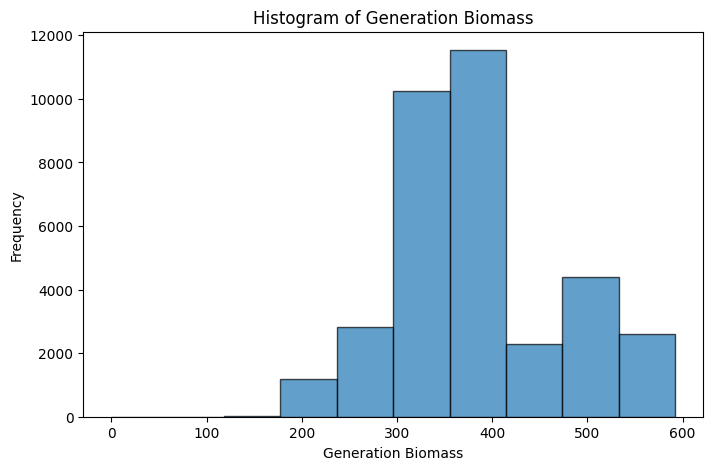

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
df = pd.DataFrame({'generation biomass': [361, 362, 351, 358, 359, 101, 589, 174, 175, 168] * 30})

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df1['generation biomass'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel("Generation Biomass")
plt.ylabel("Frequency")
plt.title("Histogram of Generation Biomass")
plt.show()


In [13]:
df1.isnull().sum()

,0
time,0
generation biomass,0
generation fossil brown coal/lignite,0
generation fossil gas,0
generation fossil hard coal,0
generation fossil oil,0
generation hydro pumped storage consumption,0
generation hydro run-of-river and poundage,0
generation hydro water reservoir,0
generation nuclear,0


In [14]:
df1.drop('time',axis=1).corr()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
generation biomass,1.000000,0.230039,-0.021520,0.433734,0.459584,-0.045069,-0.284663,-0.033307,-0.021053,0.658408,-0.560567,-0.004730,-0.346040,-0.068687,-0.008758,-0.072400,0.085636,0.083512,0.109238,0.142671
generation fossil brown coal/lignite,0.230039,1.000000,0.499902,0.768831,0.314900,-0.324051,-0.524721,-0.228836,-0.007572,0.097961,0.104441,0.040092,0.282885,-0.434172,0.041851,-0.436116,0.279094,0.280848,0.568159,0.363993
generation fossil gas,-0.021520,0.499902,1.000000,0.541684,0.309538,-0.420752,-0.271493,0.060344,-0.112292,-0.066013,0.334858,0.074487,0.275164,-0.397305,0.079868,-0.397330,0.543755,0.548981,0.640907,0.461452
generation fossil hard coal,0.433734,0.768831,0.541684,1.000000,0.440842,-0.406317,-0.497578,-0.157031,-0.023150,0.264626,-0.019534,0.045906,0.170285,-0.441756,0.046999,-0.444426,0.394877,0.397066,0.671786,0.465637
generation fossil oil,0.459584,0.314900,0.309538,0.440842,1.000000,-0.330949,-0.106446,0.160743,0.015426,0.374782,-0.115391,0.100233,-0.176149,-0.051769,0.096500,-0.058207,0.498511,0.496147,0.292828,0.285050
generation hydro pumped storage consumption,-0.045069,-0.324051,-0.420752,-0.406317,-0.330949,1.000000,0.053202,-0.234448,0.012419,0.021245,-0.267406,-0.214387,-0.188345,0.389116,-0.221749,0.390544,-0.559845,-0.562920,-0.600574,-0.426196
generation hydro run-of-river and poundage,-0.284663,-0.524721,-0.271493,-0.497578,-0.106446,0.053202,1.000000,0.652724,-0.124137,-0.127317,0.053223,0.039679,-0.286282,0.223191,0.045185,0.226456,0.120584,0.118452,-0.294524,-0.136659
generation hydro water reservoir,-0.033307,-0.228836,0.060344,-0.157031,0.160743,-0.234448,0.652724,1.000000,-0.049237,0.065342,-0.065920,0.091661,-0.288151,-0.019409,0.102868,-0.011726,0.476701,0.479458,-0.017366,0.071910
generation nuclear,-0.021053,-0.007572,-0.112292,-0.023150,0.015426,0.012419,-0.124137,-0.049237,1.000000,0.041653,-0.061961,0.003911,0.087639,0.048598,-0.001011,0.044902,0.090859,0.086102,-0.043345,-0.053016
generation other,0.658408,0.097961,-0.066013,0.264626,0.374782,0.021245,-0.127317,0.065342,0.041653,1.000000,-0.443454,-0.016762,-0.359684,0.047432,-0.019409,0.044613,0.101681,0.100770,0.043960,0.099914


In [15]:
df2.isnull().sum()

,0
dt_iso,0
city_name,0
temp,0
temp_min,0
temp_max,0
pressure,0
humidity,0
wind_speed,0
wind_deg,0
rain_1h,0


In [16]:
# forecast errors (load)
expected = df1['total load actual'].values
predictions = df1['total load forecast'].values
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
bias = sum(forecast_errors) * 1.0/len(expected)
print('Bias: %f' % bias)

Bias: -14.165062


In [17]:
actual_values =[expected[i] for i in range(len(expected))]
mean_actual = sum(actual_values) / float(len(actual_values))
print(-0.05*mean_actual)

-1434.8982450056901


so the negative bias is present but not totally out of bounds for original forecast

In [18]:
# let's calculate rmse instead of mse to maintain unit uniformity
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(expected,predictions)
print('rmse: %f' % sqrt(mse))

rmse: 452.334289


In [19]:
print('Peak total load: %f' % df1['total load actual'].max())
print('2per threshold: %f' % (0.02 * df1['total load actual'].max()))  # Added parentheses for clarity
print('5per threshold: %f' % (0.05 * df1['total load actual'].max()))  # Added parentheses for clarity

Peak total load: 41015.000000
2per threshold: 820.300000
5per threshold: 2050.750000


rmse is lesser than 2% of peak load hence no outrageous error present but improvement can be made

In [20]:
# forecast errors (price)
expected = df1['price day ahead'].values
predictions = df1['price actual'].values
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
bias = sum(forecast_errors) * 1.0/len(expected)
print('Bias: %f' % bias)

Bias: -8.009682


In [21]:
actual_values =[expected[i] for i in range(len(expected))]
mean_actual = sum(actual_values) / float(len(actual_values))
print(-0.05*mean_actual)

-2.49371706023253


negative bias is greater than threshold so not efficient

In [22]:
# let's calculate rmse instead of mse to maintain unit uniformity
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(expected,predictions)
print('rmse: %f' % sqrt(mse))

rmse: 13.249857


In [23]:
print('Peak total load: %f' % df1['price actual'].max())
print('2per threshold: %f' % (0.02 * df1['price actual'].max()))
print('5per threshold: %f' % (0.05 * df1['price actual'].max()))

Peak total load: 116.800000
2per threshold: 2.336000
5per threshold: 5.840000


rmse is less than two percent threshold so no problem. hence for price there is systematic error, but minimal overall prediction error

In [24]:
#introducing time indexing
df1['time'] = pd.to_datetime(df1['time'], utc=True, infer_datetime_format=True)
df1 = df1.set_index('time')

<ipython-input-24-b6447dfcce41>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df1['time'] = pd.to_datetime(df1['time'], utc=True, infer_datetime_format=True)


In [25]:
def plot_series(df=None, column=None, series=pd.Series([]),
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series
    created by the user. The user can define either the 'df' and the 'column'
    or the 'series' and additionally, can also define the 'label', the
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

## Focused Visualisation and Time Series Analysis

<ipython-input-26-25064b882913>:33: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.lineplot(x='hour', y='price day ahead', hue='year', data=monthly_data_day_ahead, ax=ax, marker='x', palette=palette)
<ipython-input-26-25064b882913>:33: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.lineplot(x='hour', y='price day ahead', hue='year', data=monthly_data_day_ahead, ax=ax, marker='x', palette=palette)
<ipython-input-26-25064b882913>:33: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.lineplot(x='hour', y='price day ahead', hue='year', data=monthly_data_day_ahead, ax=ax, marker='x', palette=palette)
<ipython-input-26-25064b882913>:33: UserWarning: The palette list has more values (6) than needed (1), which may not be intended.
  sns.lineplot(x='hour', y='price day ahead', hue='year', data=monthly_data_day_ahead, ax=ax, marker='x', palet

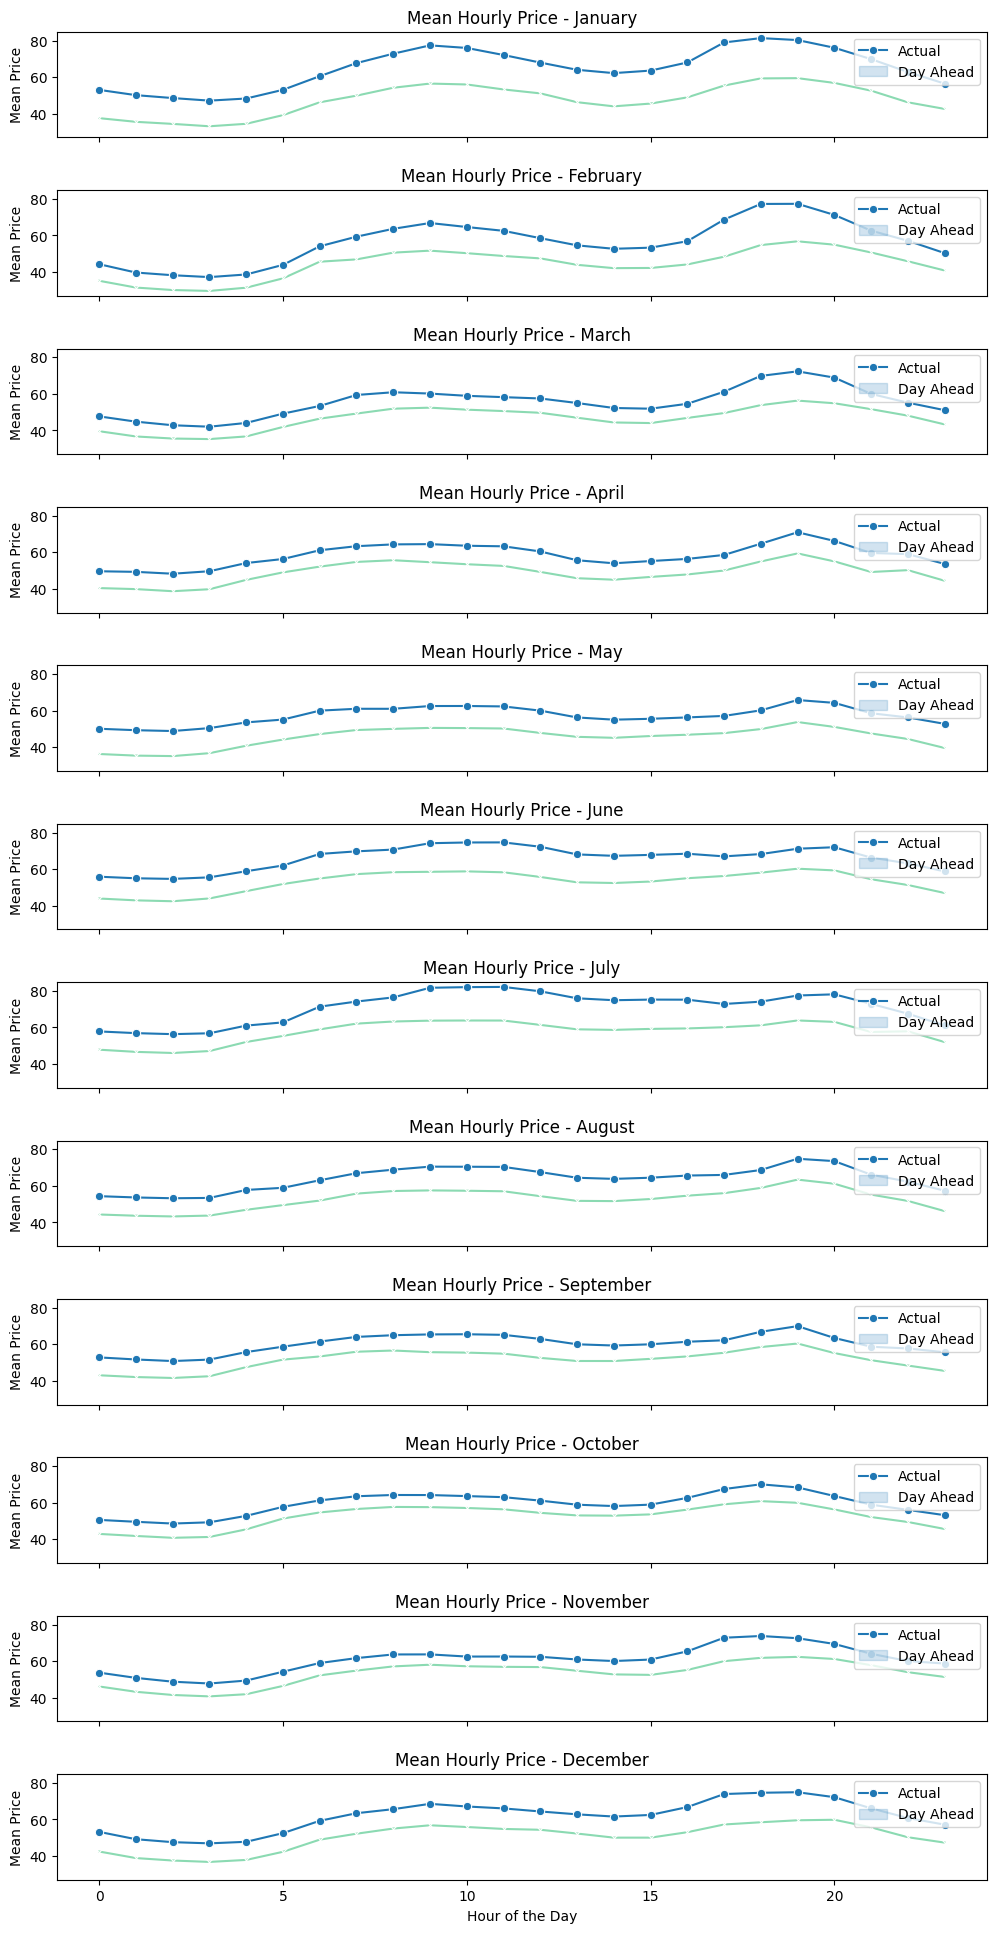

In [26]:
## now I aim to observe the difference in TSO predictions and actual price data for different months in the year 2015

for i in range(len(df1)):
    position =df1.index[i]
    hour = position.hour
    year = position.year
    month = position.month
    df1.loc[position, 'hour'] = hour
    df1.loc[position, 'year'] = year
    df1.loc[position,'month'] = month
copy_filtered = df1[df1['year'].between(2015,2015)]

# Set up the figure and subplots (12 rows, 1 column)
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(12, 24), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.5)

# Define month names for titles
month_names = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Loop through each month and plot data
for month in range(1, 13):
    ax = axes[month - 1]

    # Group by hour and year, then compute the mean price
    monthly_data_actual = copy_filtered[copy_filtered['month'] == month].groupby(['hour', 'year'])['price actual'].mean().reset_index()
    monthly_data_day_ahead = copy_filtered[copy_filtered['month'] == month].groupby(['hour', 'year'])['price day ahead'].mean().reset_index()
    # Plot each year separately
    sns.lineplot(x='hour', y='price actual', hue='year', data=monthly_data_actual, ax=ax, marker='o', palette='tab10')
    palette = sns.color_palette("mako_r", 6)
    sns.lineplot(x='hour', y='price day ahead', hue='year', data=monthly_data_day_ahead, ax=ax, marker='x', palette=palette)
    ax.set_title(f"Mean Hourly Price - {month_names[month - 1]}")
    ax.set_xlabel("Hour of the Day")
    ax.set_ylabel("Mean Price")
    ax.legend(loc="upper right",labels=['Actual','Day Ahead'])

# Show plot
plt.show()


we observe that there is a minute but significant difference between actual and day ahead forecasted prices for each hour

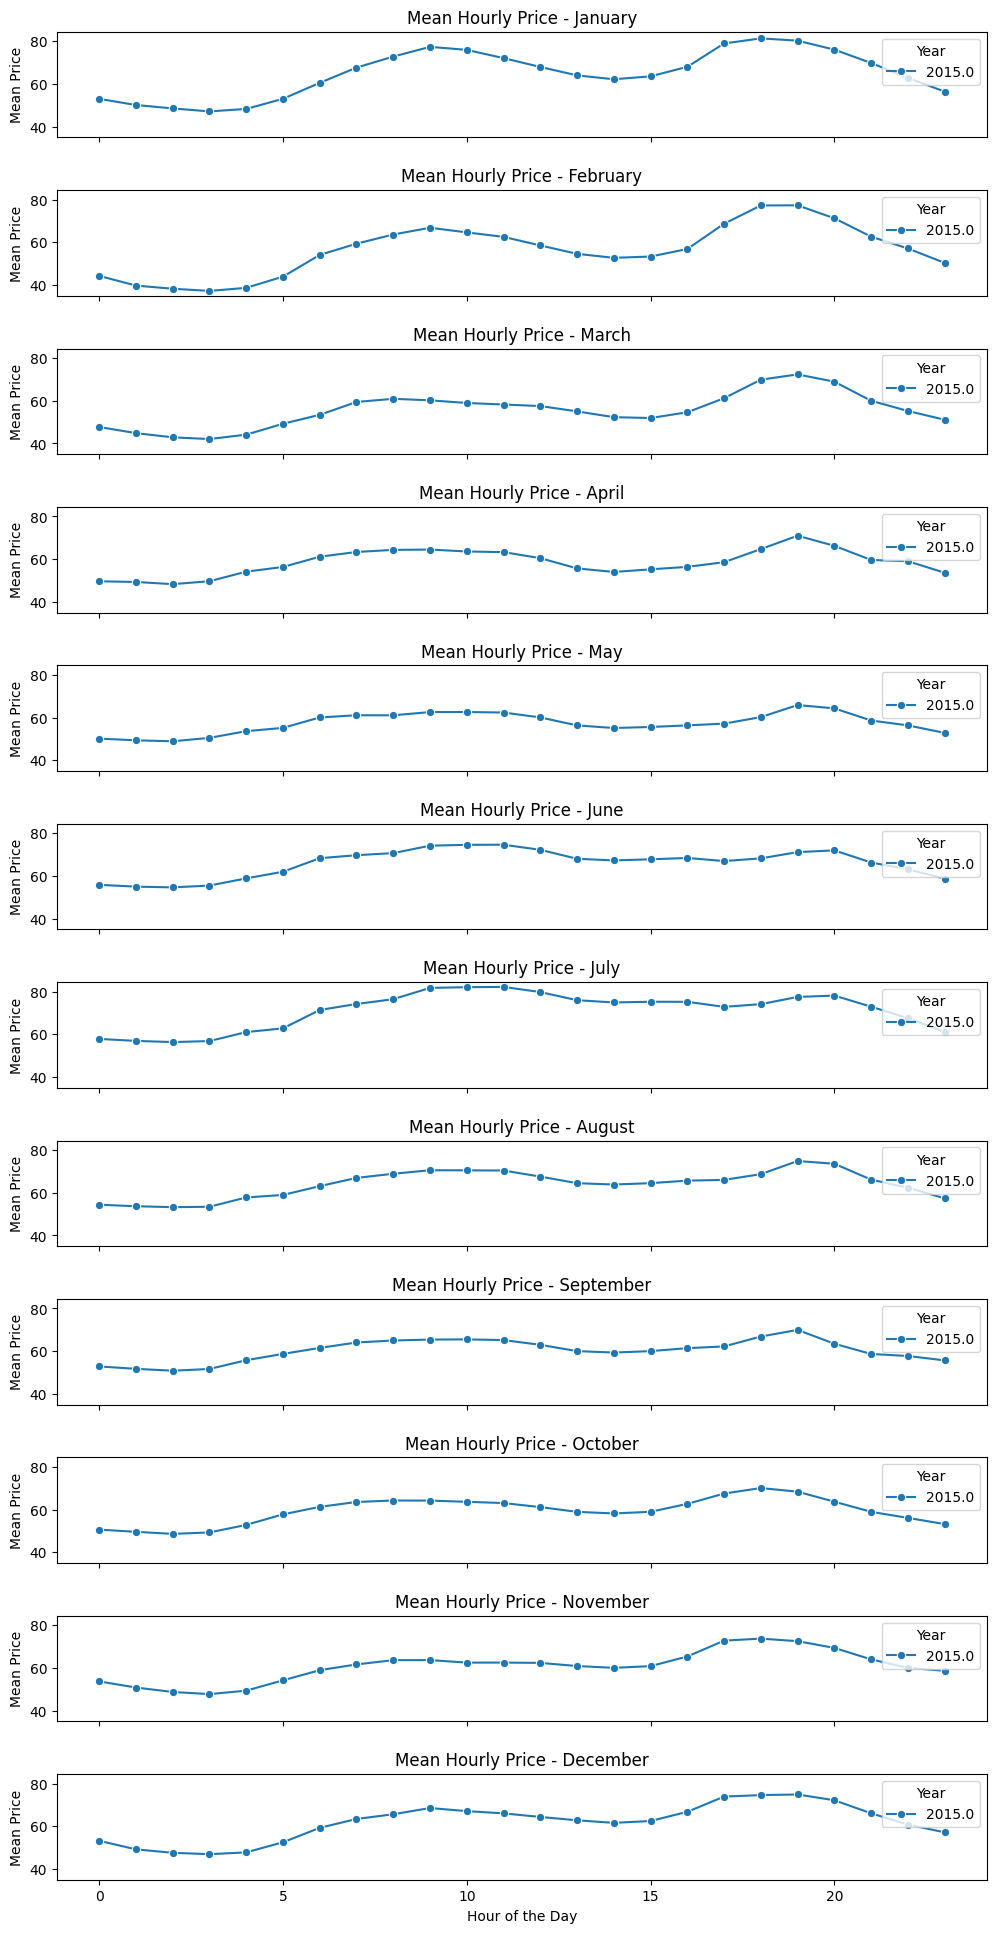

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set up the figure and subplots (12 rows, 1 column)
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(12, 24), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.5)  # Adjust spacing

# Define month names for titles
month_names = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Loop through each month and plot data
for month in range(1, 13):
    ax = axes[month - 1]

    # Group by hour and year, then compute the mean price
    monthly_data = copy_filtered[copy_filtered['month'] == month].groupby(['hour', 'year'])['price actual'].mean().reset_index()

    # Plot each year separately
    sns.lineplot(x='hour', y='price actual', hue='year', data=monthly_data, ax=ax, marker='o', palette='tab10')

    ax.set_title(f"Mean Hourly Price - {month_names[month - 1]}")
    ax.set_xlabel("Hour of the Day")
    ax.set_ylabel("Mean Price")
    ax.legend(title="Year", loc="upper right")

# Show plot
plt.show()


Regardless of month,we can see the proof of basic understanding that during night less electricity is consumed than day, so a periodicity across days across months can be easily justified.


Also, peak temperature during day for the first day of each month is observed for July which can be attributed to cooling systems being operated more often which leads to increased consumption especially during mid-day.


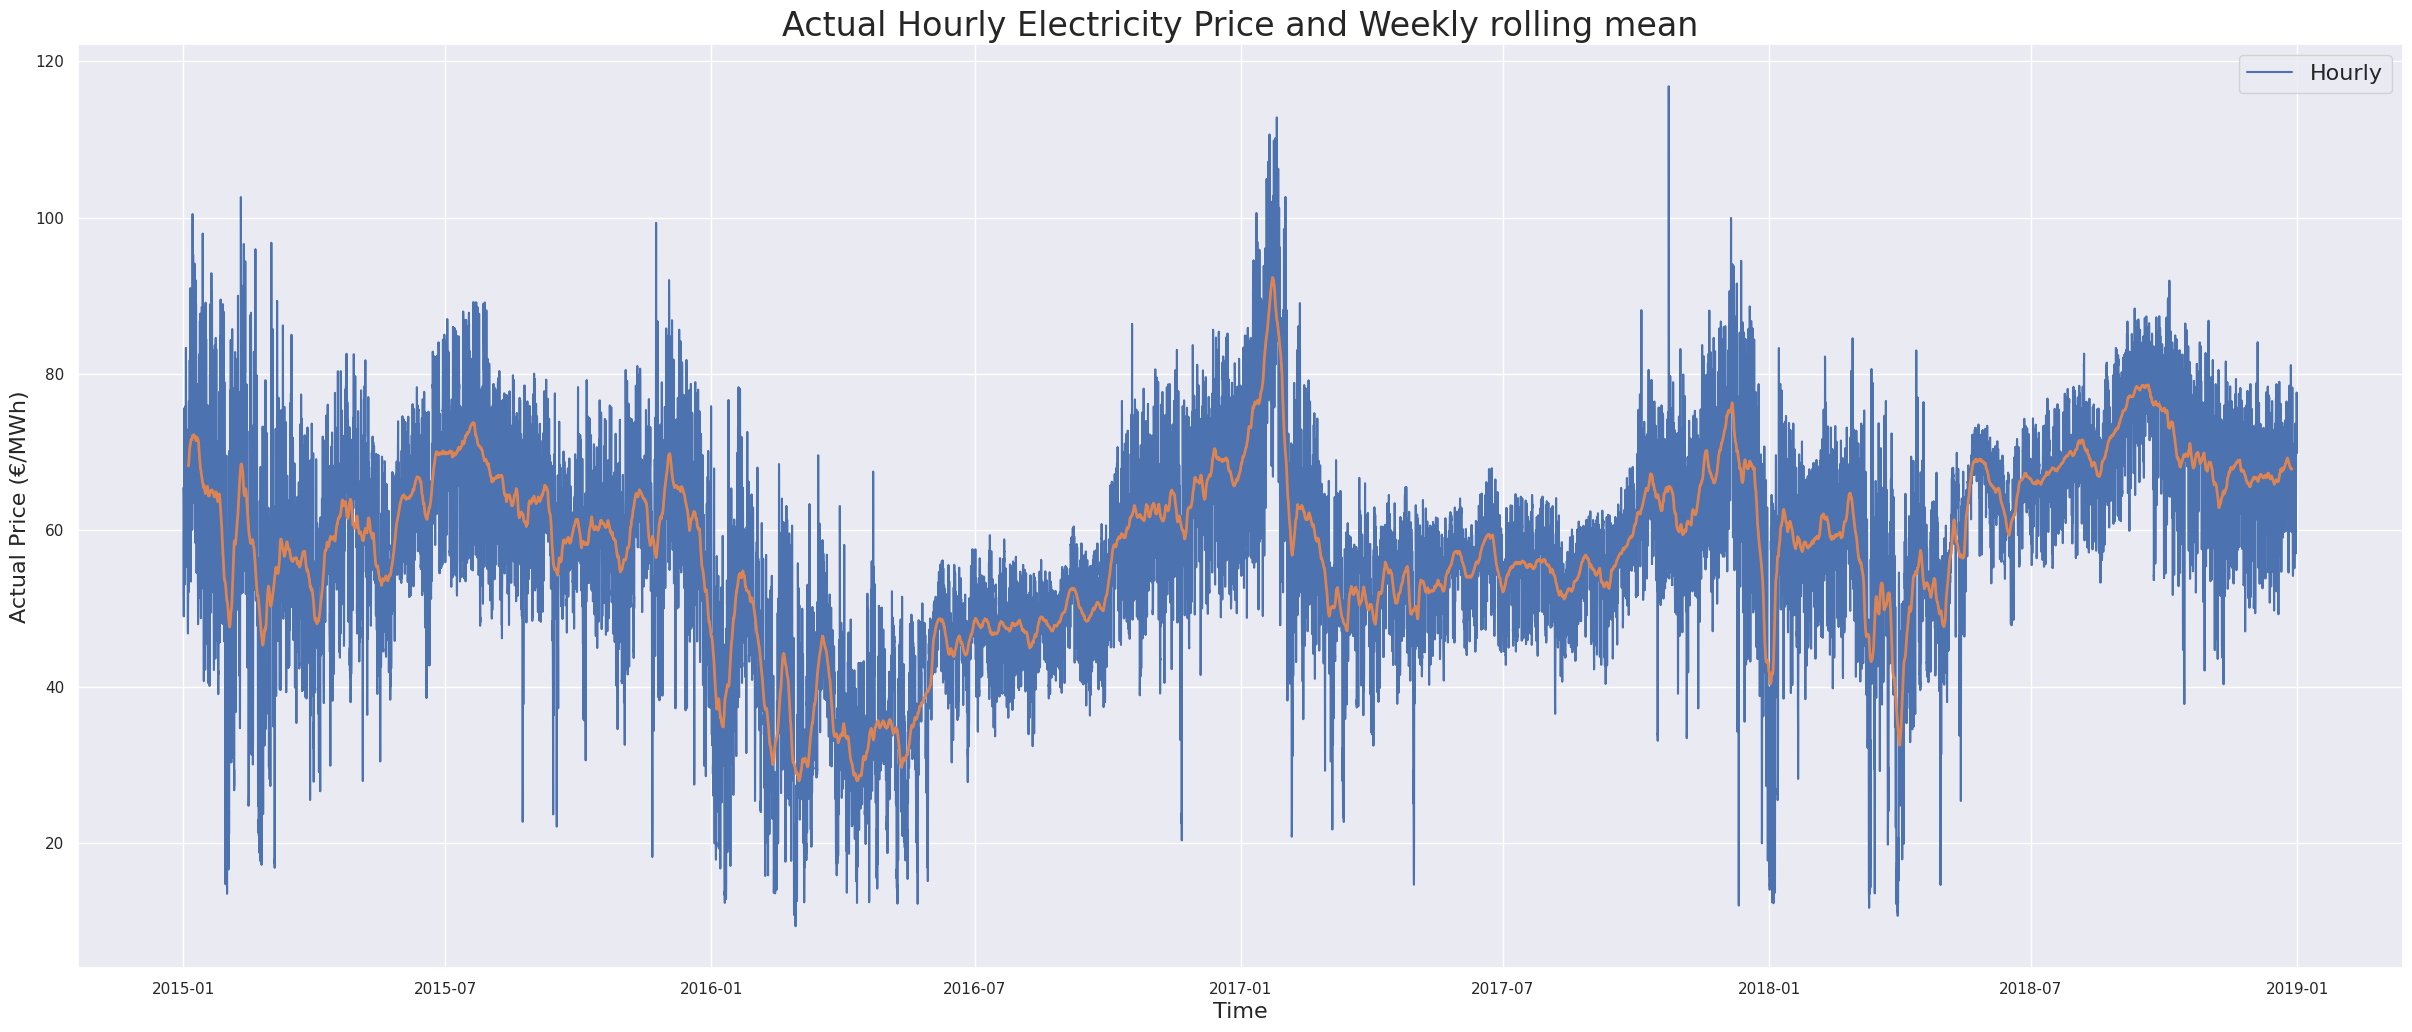

In [31]:
# Plot the hourly actual electricity price, along with the weekly rolling mean

rolling = df_final['price actual'].rolling(24*7, center=True).mean()
ax = plot_series(df_final, 'price actual', label='Hourly', ylabel='Actual Price (€/MWh)',
                 title='Actual Hourly Electricity Price and Weekly rolling mean')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

The seasonal pattern in electricity price data is clearly observed

<ipython-input-32-24746a5d67e8>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_price = df_final['price actual'].asfreq('M')
<ipython-input-32-24746a5d67e8>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  shifted = df_final['price actual'].asfreq('M').shift(12)


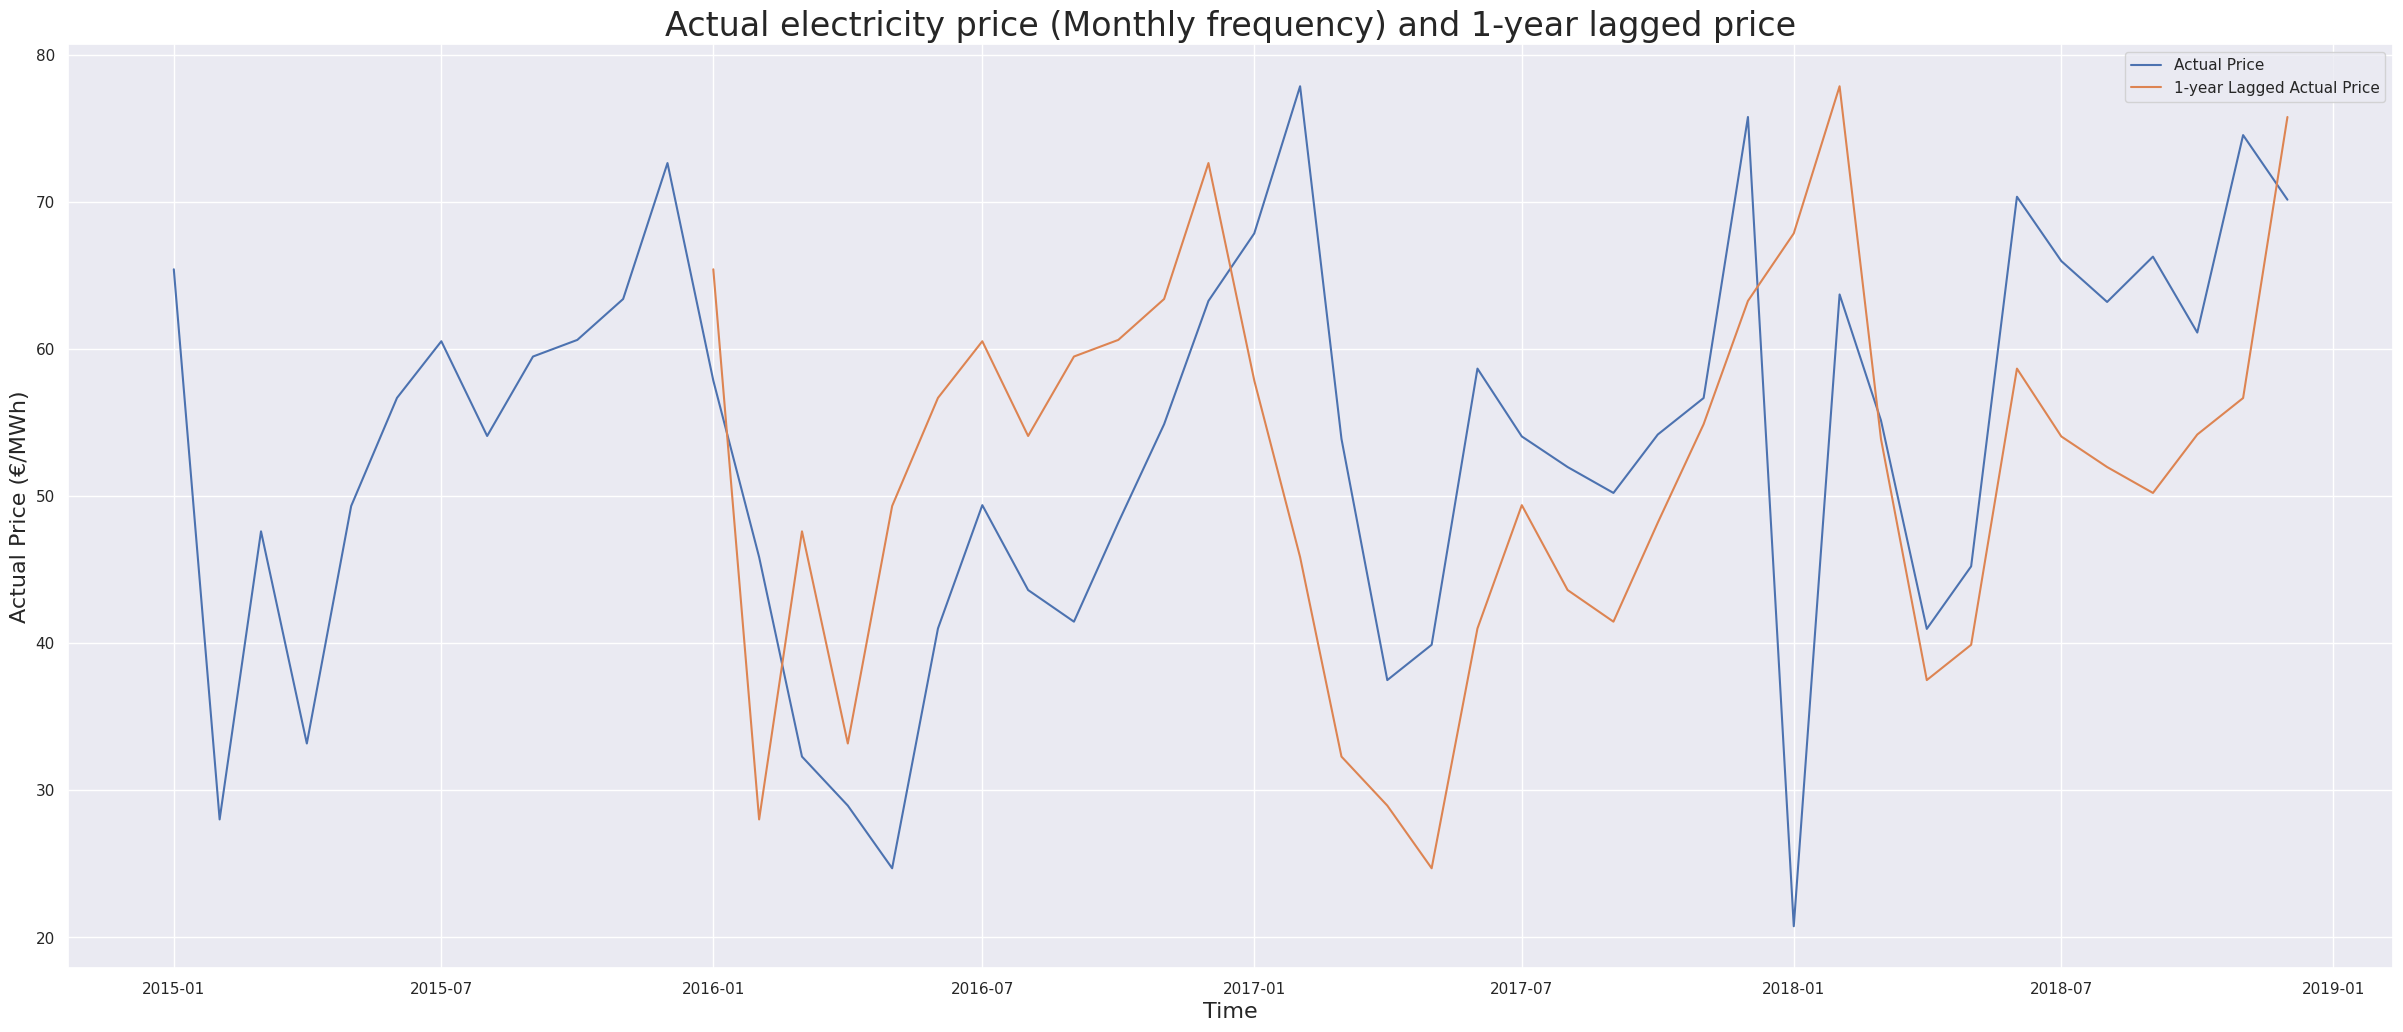

In [32]:
# Plot the electricity price (monthly frequence) along with its 1-year lagged series

monthly_price = df_final['price actual'].asfreq('M')
ax = plot_series(series=monthly_price, ylabel='Actual Price (€/MWh)',
                 title='Actual electricity price (Monthly frequency) and 1-year lagged price')
shifted = df_final['price actual'].asfreq('M').shift(12)
ax.plot(shifted, label='Hourly')
ax.legend(['Actual Price', '1-year Lagged Actual Price'])
plt.show()

Certain spikes take place at around the same time for both lagged and current year, further signifying seasonality.

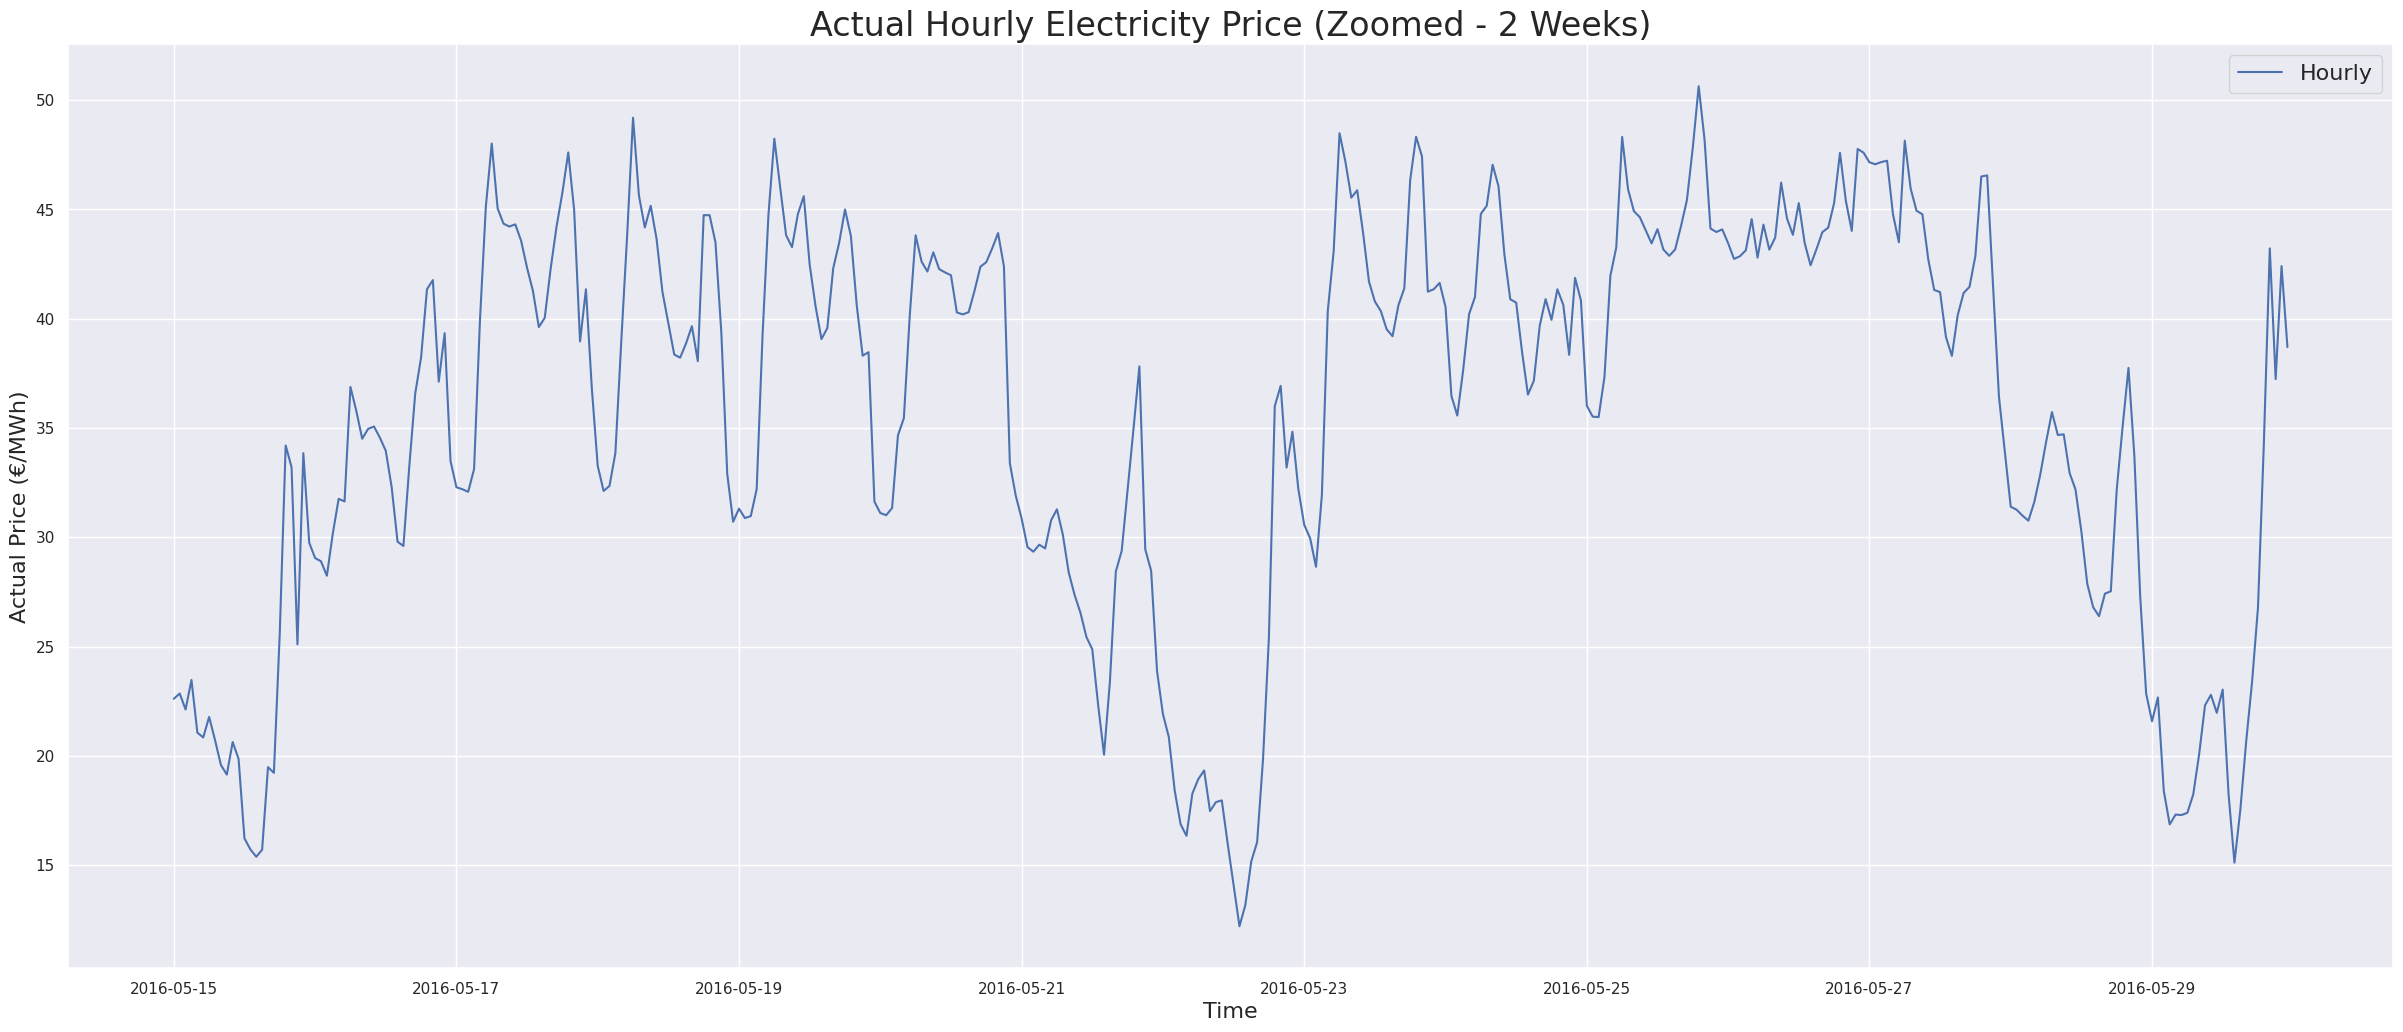

In [33]:
# Plot the actual electricity price at a daily/weekly scale

ax = plot_series(df_final, 'price actual', label='Hourly', ylabel='Actual Price (€/MWh)',
                 start=1 + 24 * 500, end=1 + 24 * 515,
                 title='Actual Hourly Electricity Price (Zoomed - 2 Weeks)')
plt.show()

In [34]:
#I won't use already done forecasts so remove all day-ahead forecasts for the total load, the solar energy and the wind energy.
df1 = df1.drop(['forecast solar day ahead','forecast wind onshore day ahead','total load forecast','price day ahead'],axis=1)

In [35]:
# assessing the value counts for features in weather data
for col in df2.columns:
    print(f"Value counts for '{col}':\n{df2[col].value_counts(),}\n")

Value counts for 'dt_iso':
(dt_iso
2017-09-30 02:00:00+02:00    10
2018-09-30 02:00:00+02:00    10
2015-10-01 02:00:00+02:00    10
2016-09-30 02:00:00+02:00    10
2018-02-28 09:00:00+01:00    10
                             ..
2016-05-07 00:00:00+02:00     5
2016-05-07 01:00:00+02:00     5
2016-05-07 02:00:00+02:00     5
2016-05-07 04:00:00+02:00     5
2016-05-06 19:00:00+02:00     5
Name: count, Length: 35064, dtype: int64,)

Value counts for 'city_name':
(city_name
Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: count, dtype: int64,)

Value counts for 'temp':
(temp
286.150    2105
287.150    2061
289.150    2041
288.150    1981
285.150    1870
           ... 
295.894       1
289.235       1
300.815       1
290.409       1
315.600       1
Name: count, Length: 20743, dtype: int64,)

Value counts for 'temp_min':
(temp_min
288.150000    6028
286.150000    5706
287.150000    5628
289.150000    5582
285.150000    5417
              

In [36]:
df2.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [37]:
## checking for redundant features in the weather data
value = 0.0
percentage_snow_3h = (df2['snow_3h'].value_counts(normalize=True) * 100).get(value, 0)

print(f"For snow_3h,Percentage of '{value}': {percentage_snow_3h:.2f}%")
percentage_rain_1h = (df2['rain_1h'].value_counts(normalize=True) * 100).get(value, 0)
print(f"For rain_1h,Percentage of '{value}': {percentage_rain_1h:.2f}%")
percentage_rain_3h = (df2['rain_3h'].value_counts(normalize=True) * 100).get(value, 0)
print(f"For rain_3h,Percentage of '{value}': {percentage_rain_3h:.2f}%")

For snow_3h,Percentage of '0.0': 99.85%
For rain_1h,Percentage of '0.0': 89.13%
For rain_3h,Percentage of '0.0': 98.96%


In [38]:
# setting 95% threshold, we see that snow_3h and rain_3h are too skewed
df2 = df2.drop(['snow_3h','rain_3h'],axis=1)

In [39]:
print(df2.dtypes)
df2 = df2.astype({col: 'float64' for col in df2.select_dtypes(include=['int64']).columns})

dt_iso                  object
city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
rain_1h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object


In [40]:
df2.dtypes

,0
dt_iso,object
city_name,object
temp,float64
temp_min,float64
temp_max,float64
pressure,float64
humidity,float64
wind_speed,float64
wind_deg,float64
rain_1h,float64


In [41]:
# checking for duplicates in the weather data for each city (ideally each city should have 35064 timestamps)
print('There are {} observations in df1.'.format(df1.shape[0]))

cities = df2['city_name'].unique()
grouped_weather = df2.groupby('city_name')

for city in cities:
    print('There are {} observations in df2'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]),
          'about city: {}.'.format(city))

There are 35064 observations in df1.
There are 35145 observations in df2 about city: Valencia.
There are 36267 observations in df2 about city: Madrid.
There are 35951 observations in df2 about city: Bilbao.
There are 35476 observations in df2 about city:  Barcelona.
There are 35557 observations in df2 about city: Seville.


since no. of observations for each city > 35064, duplicates exist for each

In [42]:
#parse time correctly and do time indexing for the weather data
df2['time'] = pd.to_datetime(df2['dt_iso'], utc=True, infer_datetime_format=True)
df2 = df2.drop(['dt_iso'], axis=1)
df2 = df2.set_index('time')
#remove duplicates
df2 = df2.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                      keep='first').set_index('time')

<ipython-input-42-2680860931a5>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2['time'] = pd.to_datetime(df2['dt_iso'], utc=True, infer_datetime_format=True)


In [43]:
# now correct no. of indices will be shown
print('There are {} observations in df1.'.format(df1.shape[0]))

cities = df2['city_name'].unique()
grouped_weather = df2.groupby('city_name')

for city in cities:
    print('There are {} observations in df2'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]),
          'about city: {}.'.format(city))

There are 35064 observations in df1.
There are 35064 observations in df2 about city: Valencia.
There are 35064 observations in df2 about city: Madrid.
There are 35064 observations in df2 about city: Bilbao.
There are 35064 observations in df2 about city:  Barcelona.
There are 35064 observations in df2 about city: Seville.


In [44]:
df2.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,weather_id,weather_main,weather_description,weather_icon
time,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,800.0,clear,sky is clear,01n


In [45]:
#weather_icon is more useful for visualisation than actual forecasting, so I choose to omit this feature.
df2 = df2.drop(['weather_icon'],axis=1)

Now from correlation matrix, we observe that there is high similarity between 'weather_id','weather_main','weather_description' features in weather data

In [46]:
#let's check value variety of these features to suggest some feature engineering
for col in ['weather_id','weather_main','weather_description']:
  print(df2[col].value_counts().sort_index(ascending=False))

weather_id
804.0     2561
803.0    17447
802.0    15943
801.0    32099
800.0    82670
771.0        1
761.0      310
741.0     1919
731.0        2
721.0      394
711.0       33
701.0     3060
620.0        1
616.0        6
615.0       15
611.0        3
602.0        2
601.0       35
600.0      102
531.0        1
522.0       72
521.0      798
520.0      568
503.0       78
502.0     1139
501.0     3554
500.0    10557
311.0       15
310.0       54
302.0       11
301.0      229
300.0      866
211.0      588
210.0        1
202.0       25
201.0       88
200.0       73
Name: count, dtype: int64
weather_main
thunderstorm      775
squall              1
snow              164
smoke              33
rain            16767
mist             3060
haze              394
fog              1919
dust              312
drizzle          1175
clouds          68050
clear           82670
Name: count, dtype: int64
weather_description
very heavy rain                    78
thunderstorm with rain             88
thunderst

In [47]:
'''Weather ID Range	Weather Type
200–232	Thunderstorm
300–321	Drizzle
500–531	Rain
600–622	Snow
700–781	Atmosphere (Fog, Smoke, etc.)
800	Clear
801–804	Clouds ''' #obtained from external web source
# Define encoding function
def encode_weather_id(wid):
    if 200 <= wid <= 232:
        return "thunderstorm"
    elif 300 <= wid <= 321:
        return "drizzle"
    elif 500 <= wid <= 531:
        return "rain"
    elif 600 <= wid <= 622:
        return "snow"
    elif 700 <= wid <= 781:
        return "atmosphere"
    elif wid == 800:
        return "clear"
    elif 801 <= wid <= 804:
        return "clouds"
    else:
        return "unknown"

# Apply encoding
df2['weather_category'] = df2['weather_id'].apply(encode_weather_id)

df2.head()


,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,clouds_all,weather_id,weather_main,weather_description,weather_category
time,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,800.0,clear,sky is clear,clear
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,800.0,clear,sky is clear,clear
2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,800.0,clear,sky is clear,clear
2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,800.0,clear,sky is clear,clear
2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,800.0,clear,sky is clear,clear


In [48]:
# Check how many values are the same
similarity = (df2['weather_main'] == df2['weather_category']).mean() * 100
print(f"Similarity: {similarity:.2f}%")


Similarity: 96.74%


In [49]:
# since weather_main and weather_category are highly similar, but weather_main is more diverse, I can drop weather_category as well as its predecessor weather_id
df2 = df2.drop(['weather_category','weather_id'],axis=1)

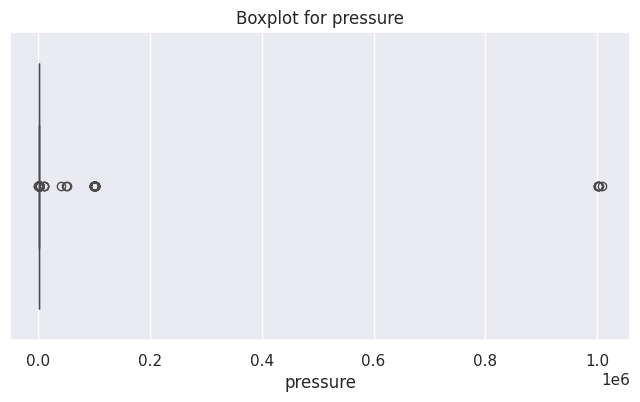

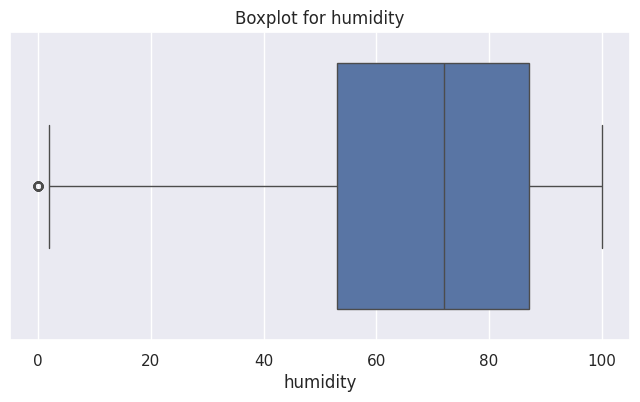

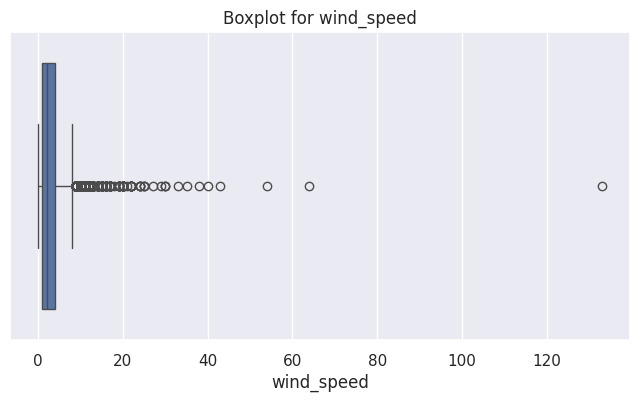

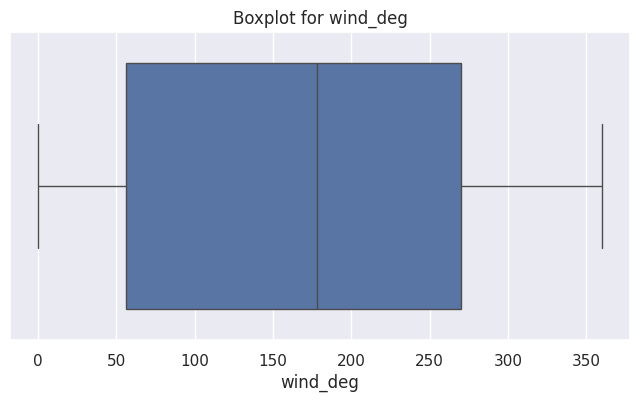

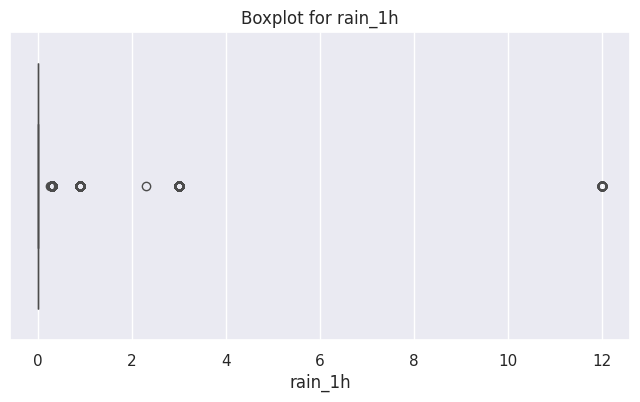

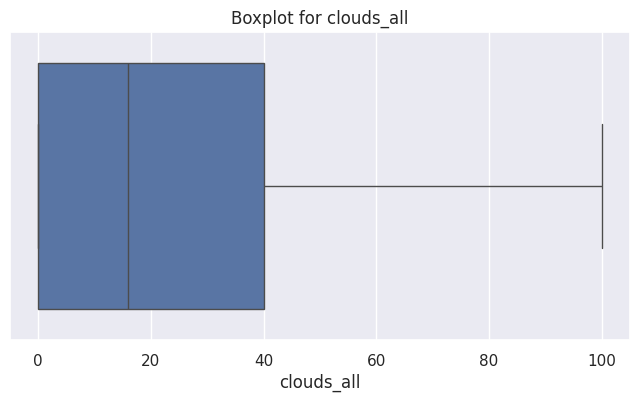

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in ['pressure','humidity','wind_speed','wind_deg','rain_1h','clouds_all']:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x=df2[col])
  plt.title(f"Boxplot for {col}")
  plt.show()

In [51]:
''' the weather features with high amount of outliers are- pressure,wind speed and rain_1h
best if we use domain knowledge:
  lowest pressure recorded in spain-portugal peninsula: 931 kpa and highest: 1051 kpa
  highest wind speed: 55 m/s
  rain_1h is highly spontaneous and no good to tackle outliers
  I didn't try scaling as it's highly sensitive to outliers'''
# Replace outliers in 'pressure' with NaNs

df2.loc[df2.pressure > 1051, 'pressure'] = np.nan
df2.loc[df2.pressure < 931, 'pressure'] = np.nan

# Replace outliers in 'wind_speed' with NaNs

df2.loc[df2.wind_speed > 55, 'wind_speed'] = np.nan

In [52]:
''' Fill null values using interpolation (we use interpolation due to nature of data
Linear interpolation is good when:
--> Data changes smoothly over time (e.g., temperature, pressure, energy load).
--> Missing values are not at the start or end (since interpolation needs neighboring values).
--> No sudden jumps or outliers exist (otherwise, interpolation may be misleading).) '''

df2.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

<ipython-input-52-c65a4d3ceb8e>:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df2.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)


In [53]:
''' time to merge the datasets
since 5 cities have each no. of rows = no. of rows in the energy dataset, we have to split the weather dataset by city and then merge it with the energy dataset'''

# Split the df_weather into 5 dataframes (one for each city)

df_1, df_2, df_3, df_4, df_5 = [x for _, x in df2.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]
# Merge all dataframes into the final dataframe

df_final = df1

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    df_final = df_final.merge(df, on=['time'], how='outer')
    df_final = df_final.drop('city_name_{}'.format(city_str), axis=1)

df_final.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price actual', 'hour', 'year', 'month', 'temp_Barcelona',
       'temp_min_Barcelona', 'temp_max_Barcelona', 'pressure_Barcelona',
       'humidity_Barcelona', 'wind_speed_Barcelona', 'wind_deg_Barcelona',
       'rain_1h_Barcelona', 'clouds_all_Barcelona', 'weather_main_Barcelona',
       'weather_description_Barcelona', 'temp_Bilbao', 'temp_min_Bilbao',
       'temp_max_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'wind_deg_Bilbao', 'rain_1h_Bilbao',
       'clouds_all_Bilba

In [54]:
df_final.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,hour,year,month,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,clouds_all_Barcelona,weather_main_Barcelona,weather_description_Barcelona,temp_Bilbao,temp_min_Bilbao,temp_max_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,clouds_all_Bilbao,weather_main_Bilbao,weather_description_Bilbao,temp_Madrid,temp_min_Madrid,temp_max_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,clouds_all_Madrid,weather_main_Madrid,weather_description_Madrid,temp_Seville,temp_min_Seville,temp_max_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,clouds_all_Seville,weather_main_Seville,weather_description_Seville,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,clouds_all_Valencia,weather_main_Valencia,weather_description_Valencia
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,23.0,2014.0,12.0,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,0.0,0.0,clear,sky is clear,269.657312,269.657312,269.657312,1036.0,97.0,0.0,226.0,0.0,0.0,clear,sky is clear,267.325,267.325,267.325,971.0,63.0,1.0,309.0,0.0,0.0,clear,sky is clear,273.375,273.375,273.375,1039.0,75.0,1.0,21.0,0.0,0.0,clear,sky is clear,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,clear,sky is clear
2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,0.0,2015.0,1.0,281.625,281.625,281.625,1035.0,100.0,7.0,58.0,0.0,0.0,clear,sky is clear,269.763500,269.763500,269.763500,1035.0,97.0,0.0,229.0,0.0,0.0,clear,sky is clear,267.325,267.325,267.325,971.0,63.0,1.0,309.0,0.0,0.0,clear,sky is clear,273.375,273.375,273.375,1039.0,75.0,1.0,21.0,0.0,0.0,clear,sky is clear,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,clear,sky is clear
2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,1.0,2015.0,1.0,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,0.0,0.0,clear,sky is clear,269.251688,269.251688,269.251688,1036.0,97.0,1.0,224.0,0.0,0.0,clear,sky is clear,266.186,266.186,266.186,971.0,64.0,1.0,273.0,0.0,0.0,clear,sky is clear,274.086,274.086,274.086,1039.0,71.0,3.0,27.0,0.0,0.0,clear,sky is clear,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,clear,sky is clear
2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,2.0,2015.0,1.0,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,0.0,0.0,clear,sky is clear,269.203344,269.203344,269.203344,1035.0,97.0,1.0,225.0,0.0,0.0,clear,sky is clear,266.186,266.186,266.186,971.0,64.0,1.0,273.0,0.0,0.0,clear,sky is clear,274.086,274.086,274.086,1039.0,71.0,3.0,27.0,0.0,0.0,clear,sky is clear,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,clear,sky is clear
2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,3.0,2015.0,1.0,281.286,281.286,281.286,1036.0,100.0,7.0,48.0,0.0,0.0,clear,sky is clear,269.485500,269.485500,269.485500,1035.0,97.0,1.0,221.0,0.0,0.0,clear,sky is clear,266.186,266.186,266.186,971.0,64.0,1.0,273.0,0.0,0.0,clear,sky is clear,274.086,274.086,274.086,1039.0,71.0,3.0,27.0,0.0,0.0,clear,sky is c

In [55]:
## I try to introduce a severity index for weather based on how weather impacts energy consumption
## using impact on energy consumption rather than price data as it's more stationary, so temporal nature of weather conditions can be managed
# Compute mean energy load for each weather condition
for city in ['Barcelona','Bilbao','Madrid','Seville','Valencia']:

  weather_load_avg = df_final.groupby("weather_description_"+city)["total load actual"].mean()

# Sort in descending order
  weather_load_avg_sorted = weather_load_avg.sort_values(ascending=False)
# Normalize the energy load impact between 0 and 1
  weather_severity_index = (weather_load_avg_sorted - weather_load_avg_sorted.min()) / (weather_load_avg_sorted.max() - weather_load_avg_sorted.min())

# Scale to a range of 0-10
  weather_severity_index = weather_severity_index * 10

# Convert to dictionary for mapping
  weather_severity_dict = weather_severity_index.to_dict()

# Apply mapping to create a new feature
  df_final["weather_severity_"+city] = df_final["weather_description_"+city].map(weather_severity_dict)


In [56]:
#drop weather_main and weather_description features for each city
for city in ['Barcelona','Bilbao','Madrid','Seville','Valencia']:
  df_final = df_final.drop(['weather_main_'+city,'weather_description_'+city],axis=1)

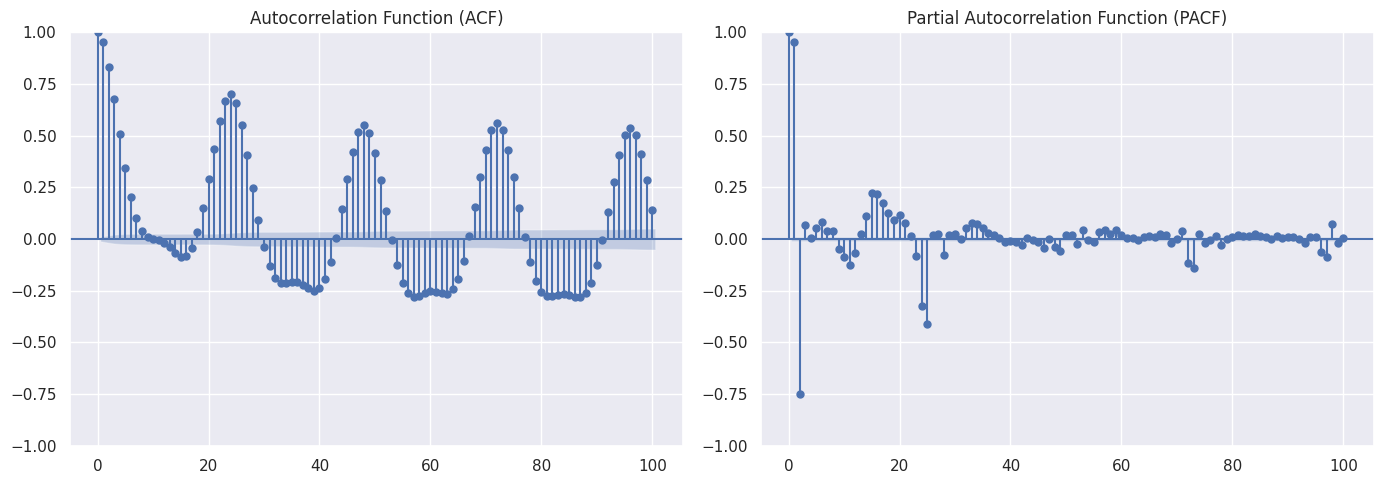

In [57]:
!pip install statsmodels
import statsmodels
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
## we aim to plot ACF and PACF plots for load data to check for stationarity
## even though we aim to predict prices, but it's better if an exogenous variable doesn't display temporal nature (non-stationarity)
# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot (Autocorrelation Function)
plot_acf(df_final["total load actual"].dropna(), lags=100, ax=axes[0], alpha=0.05)  # 95% confidence interval
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF plot (Partial Autocorrelation Function)
plot_pacf(df_final["total load actual"].dropna(), lags=100, ax=axes[1], alpha=0.05, method='ywm')  # 95% CI
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


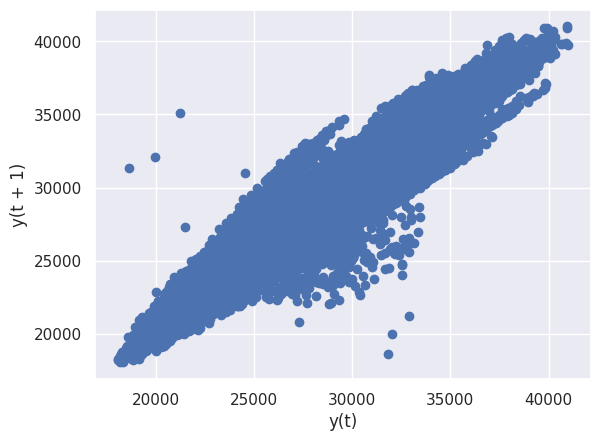

In [58]:
## for any lag, acf decreases smoothly, but for lag = 1, lag = 5 cutoff in pacf is sudden
## this suggests an AR model with possible p values of 1,5 (will have to experiment)
# lag plot of time series
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = df_final['total load actual']
lag_plot(series)
pyplot.show()

we can clearly see a strong correlation between instantaneous load and one-lagged load

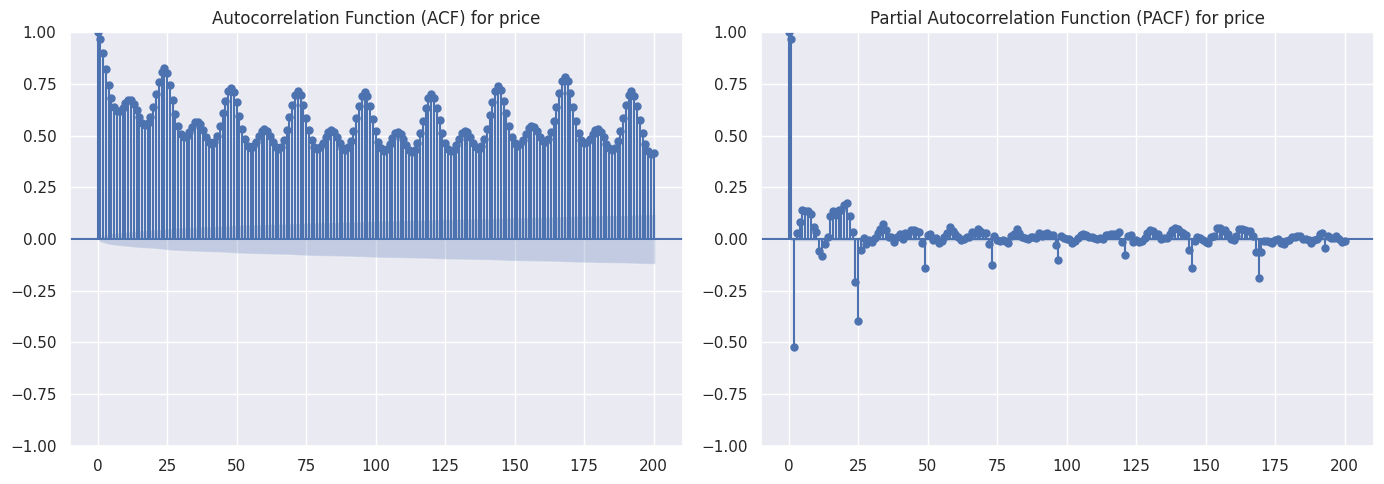

In [59]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot (Autocorrelation Function)
plot_acf(df_final["price actual"].dropna(), lags=200, ax=axes[0], alpha=0.05)  # 95% confidence interval
axes[0].set_title("Autocorrelation Function (ACF) for price")

# PACF plot (Partial Autocorrelation Function)
plot_pacf(df_final["price actual"].dropna(), lags=200, ax=axes[1], alpha=0.05, method='ywm')  # 95% CI
axes[1].set_title("Partial Autocorrelation Function (PACF) for price")

plt.tight_layout()
plt.show()


--> we can see that ACF plot does not trail off to 0, and has evident seasonality, so completely non stationary data

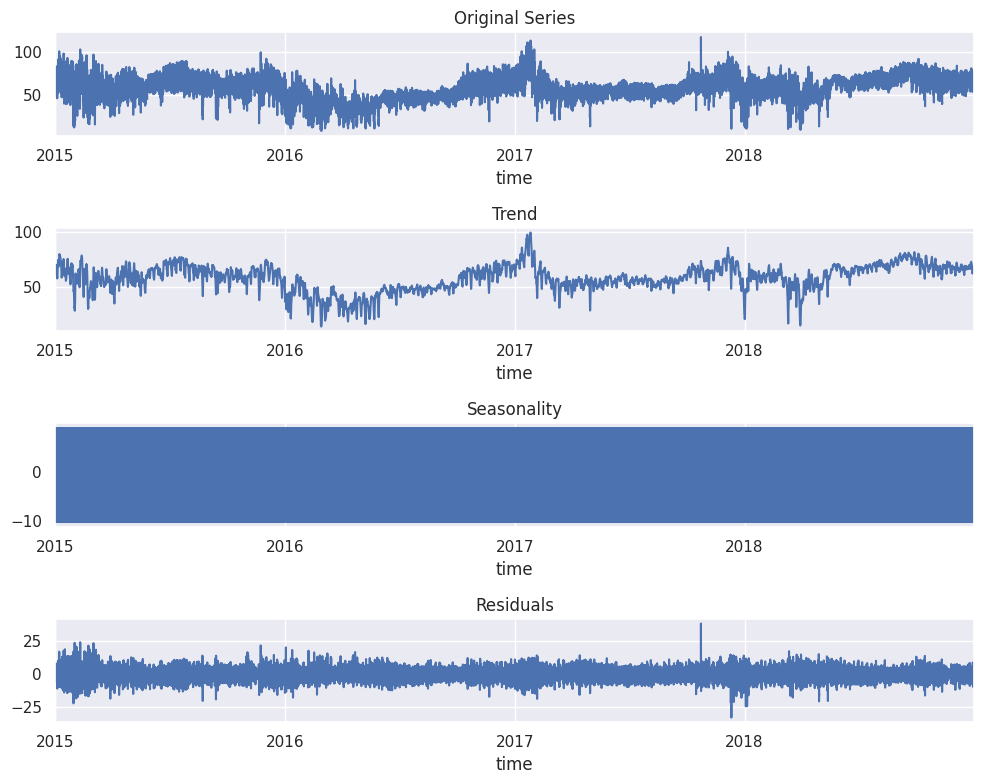

<Figure size 640x480 with 0 Axes>

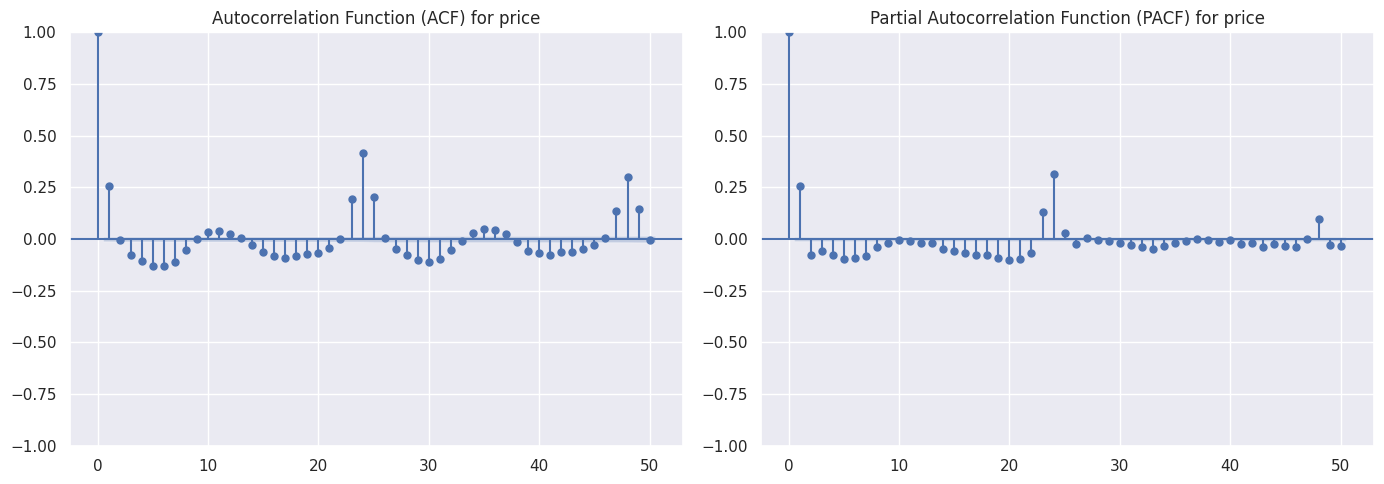

In [60]:
## aim to perform deseasonalisation by subtracting seasonal component from price feature
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_final['price actual'], model='additive', period=24)
df_final['deseasonalized_prices'] = df_final['price actual'] - result.seasonal

# Plot the components
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
result.observed.plot(ax=axes[0], title='Original Series')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonality')
result.resid.plot(ax=axes[3], title='Residuals')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

df_final['deseasonalized_prices'] = df_final['deseasonalized_prices'].diff()
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df_final['deseasonalized_prices'] = df_final['deseasonalized_prices'].fillna(df_final['deseasonalized_prices'].mean())

## plotting ACF and PACF plots of deseasonalized feature
# ACF plot (Autocorrelation Function)
plot_acf(df_final["deseasonalized_prices"], lags=50, ax=axes[0], alpha=0.05)  # 95% confidence interval
axes[0].set_title("Autocorrelation Function (ACF) for price")

# Calculate appropriate lags based on data size
nlags = min(50, len(df_final["deseasonalized_prices"].dropna()) // 2 - 1)

# PACF plot (Partial Autocorrelation Function) with adjusted lags
plot_pacf(df_final["deseasonalized_prices"].dropna(), lags=nlags, ax=axes[1], alpha=0.05, method='ywm')  # 95% CI
axes[1].set_title("Partial Autocorrelation Function (PACF) for price")

plt.tight_layout()
plt.show()

Non-stationarity was not wholly removed, but the effect was minimized

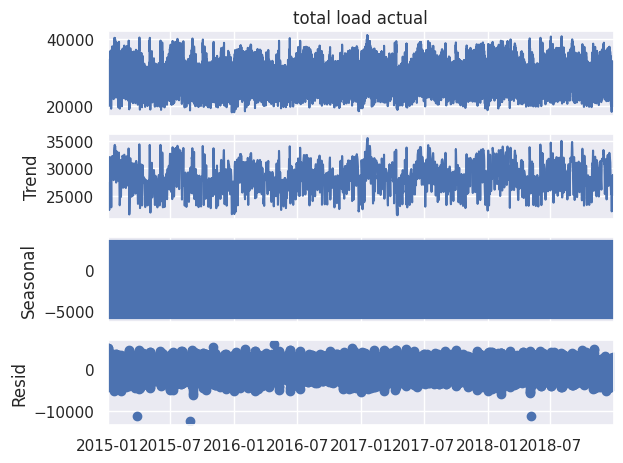

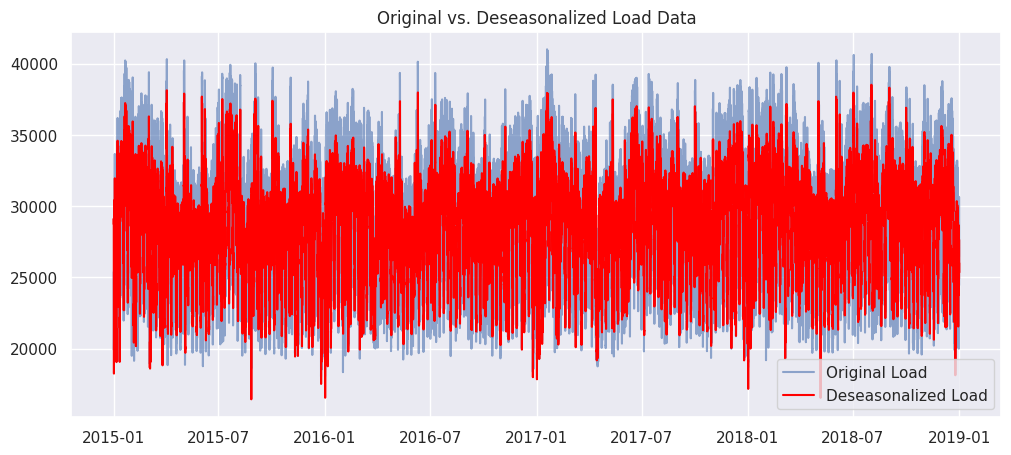

In [61]:
## from the acf of load consumption data, we observe peaks at regular intervals, this implies high seasonality in data
## so I want to deseasonalise data through decomposition

# Decompose Time Series to Identify Seasonality
decomposition = seasonal_decompose(df_final['total load actual'], model='additive', period=24)

# Plot Seasonal Decomposition
decomposition.plot()
plt.show()

# Remove Seasonal Component
df_final['deseasonalized_load'] = df_final['total load actual'] - decomposition.seasonal

# Plot Original vs Deseasonalized Data
plt.figure(figsize=(12, 5))
plt.plot(df_final.index, df_final['total load actual'], label='Original Load', alpha=0.6)
plt.plot(df_final.index, df_final['deseasonalized_load'], label='Deseasonalized Load', color='red')
plt.title("Original vs. Deseasonalized Load Data")
plt.legend()
plt.show()



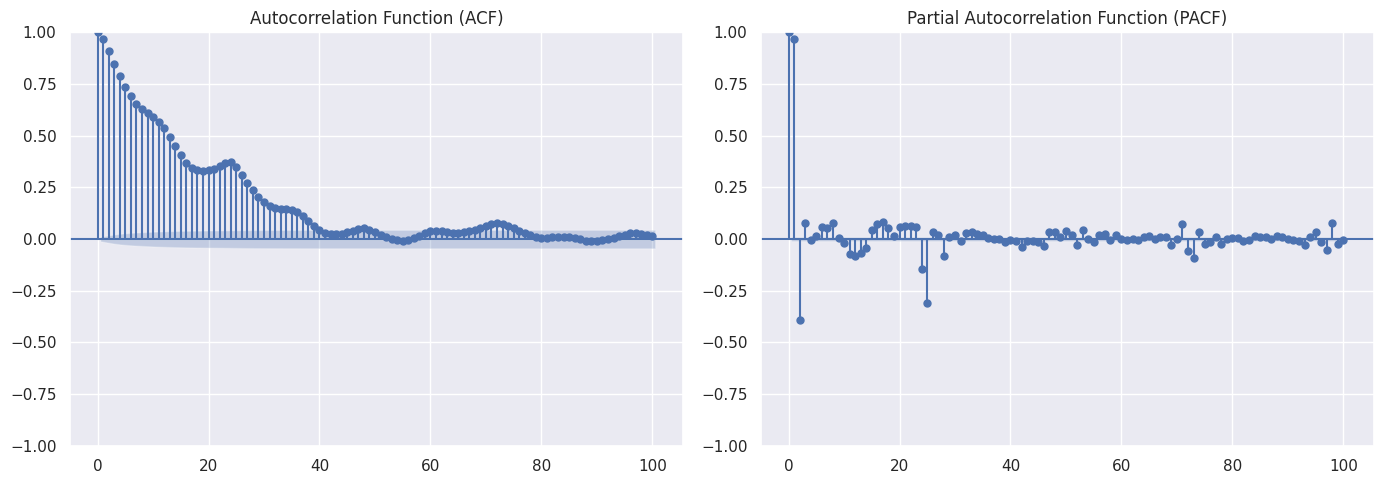

In [62]:
# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF plot (Autocorrelation Function)
plot_acf(df_final["deseasonalized_load"].dropna(), lags=100, ax=axes[0], alpha=0.05)  # 95% confidence interval
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF plot (Partial Autocorrelation Function)
plot_pacf(df_final["deseasonalized_load"].dropna(), lags=100, ax=axes[1], alpha=0.05, method='ywm')  # 95% CI
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

ACF trails off to zero and PACF cuts off abruptly to 0 at lag 2, indicating correct application of Autoregression AR(p=1) model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Train MAPE: 0.003
Test MAPE: 0.086


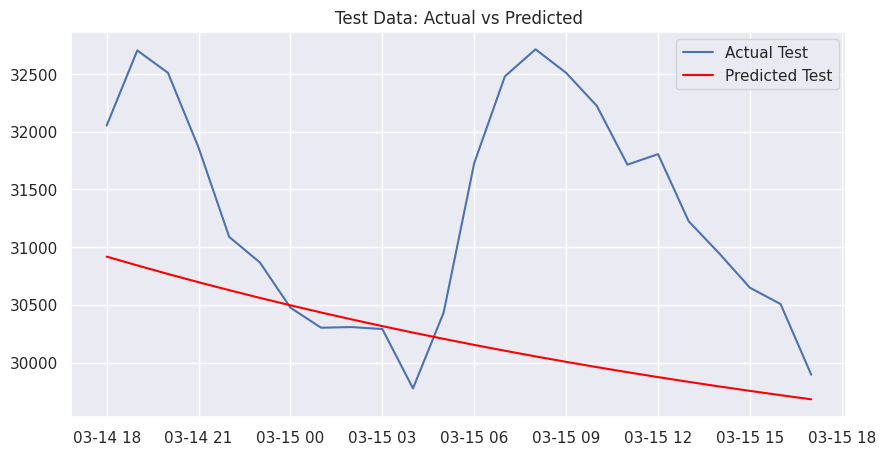

In [63]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_percentage_error

# load dataset
X = df_final['deseasonalized_load']

# Split dataset into train and test
train_size = int(len(df_final) * 0.8)
train, test = X[:train_size], X[train_size:]

# Train autoregression model
model = AutoReg(train, lags=1)
model_fit = model.fit()


# Make predictions on both train and test
train_pred = model_fit.predict(start=1, end=len(train))  # Predict for train data
test_pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)  # Predict for test data

# Compute MAPE for train and test
train_mape = mean_absolute_percentage_error(train[0:], train_pred)
test_mape = mean_absolute_percentage_error(test, test_pred)

print(f'Train MAPE: {train_mape:.3f}')
print(f'Test MAPE: {test_mape:.3f}')

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(test[:24], label='Actual Test')
plt.plot(test_pred[:24], color='red', label='Predicted Test')
plt.legend()
plt.title('Test Data: Actual vs Predicted')
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Train MAPE: 0.051
Test MAPE: 0.515


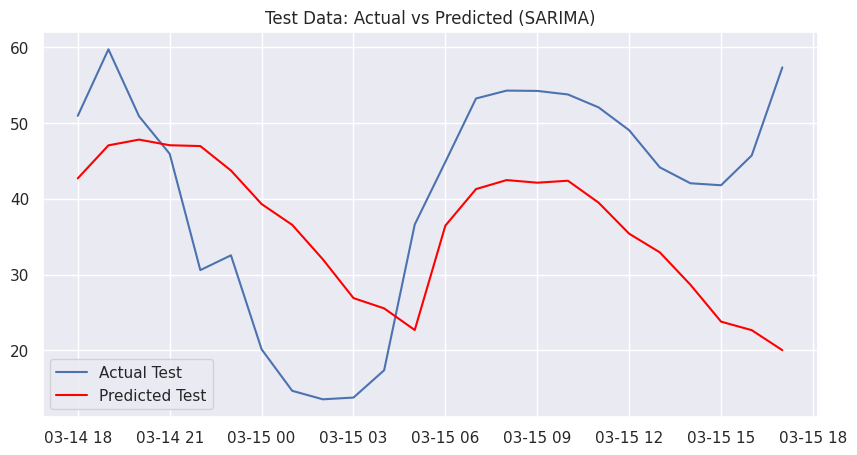

In [64]:
## since price data still has significant stationarity let's attempt to apply SARIMA model to counter that seasonality component
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

# Load dataset
X = df_final['price actual']

# Split dataset into train and test
train_size = int(len(df_final) * 0.8)
train, test = X[:train_size], X[train_size:]

# Define SARIMA Model (p, d, q) x (P, D, Q, s)
# Here, s=12 assumes a half-daily cycle in hourly data. Adjust accordingly.
model = SARIMAX(train, order=(1,0,0), seasonal_order=(0,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

# Make predictions on both train and test
train_pred = model_fit.predict(start=1, end=len(train))  # Predict for train data
test_pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)  # Predict for test data

# Compute MAPE for train and test
train_mape = mean_absolute_percentage_error(train[1:], train_pred[1:])  # Ignore first value due to differencing
test_mape = mean_absolute_percentage_error(test, test_pred)

print(f'Train MAPE: {train_mape:.3f}')
print(f'Test MAPE: {test_mape:.3f}')

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(test[:24], label='Actual Test')
plt.plot(test_pred[:24], color='red', label='Predicted Test')
plt.legend()
plt.title('Test Data: Actual vs Predicted (SARIMA)')
plt.show()


##Feature Engineering

In [65]:
# now I want to bring in the exogenous features, but for that let's perform some feature engineering
df_final.corr()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,hour,year,month,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,clouds_all_Barcelona,temp_Bilbao,temp_min_Bilbao,temp_max_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,clouds_all_Bilbao,temp_Madrid,temp_min_Madrid,temp_max_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,clouds_all_Madrid,temp_Seville,temp_min_Seville,temp_max_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,clouds_all_Seville,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,clouds_all_Valencia,weather_severity_Barcelona,weather_severity_Bilbao,weather_severity_Madrid,weather_severity_Seville,weather_severity_Valencia,deseasonalized_prices,deseasonalized_load
generation biomass,1.000000,0.230039,-0.021520,0.433734,0.459584,-0.045069,-0.284663,-0.033307,-0.021053,0.658408,-0.560567,-0.004730,-0.346040,-0.068687,0.083512,0.142671,0.022087,-0.639158,-0.003866,0.031311,0.004820,0.042847,0.110089,-0.033113,0.093668,0.099675,0.005626,0.020393,0.010748,0.042985,-0.032399,0.162144,0.030631,-0.088235,0.032080,0.129655,-0.008845,0.024535,0.012471,0.022768,-0.161356,-0.040062,-0.046603,0.019205,-0.032977,-0.054757,0.088584,0.074675,0.098778,0.129107,-0.055294,-0.026347,-0.023959,-0.006397,-0.011548,-0.007855,-0.035544,0.017434,0.006213,0.026819,-0.045502,-0.039436,0.053395,0.022827,0.051867,0.039693,-0.077640,-0.015715,-0.061843,0.003388,0.093689
generation fossil brown coal/lignite,0.230039,1.000000,0.499902,0.768831,0.314900,-0.324051,-0.524721,-0.228836,-0.007572,0.097961,0.104441,0.040092,0.282885,-0.434172,0.280848,0.363993,0.051786,-0.101349,0.201729,0.067775,0.067893,0.065853,0.178709,0.032295,-0.060653,-0.050804,-0.061605,0.017032,0.075163,0.073482,0.078429,0.055202,-0.013938,-0.086868,-0.092420,-0.111262,-0.087485,0.058749,0.051809,0.058828,-0.006826,-0.030773,-0.146509,-0.036607,-0.024625,-0.038923,0.070234,0.055245,0.078274,0.065465,-0.045302,-0.071248,-0.101228,-0.016077,-0.046920,0.050608,0.064736,0.036726,0.058591,0.123582,-0.119041,-0.085256,-0.005104,0.043039,0.009002,-0.026232,-0.018087,0.008094,0.003754,-0.000050,0.316597
generation fossil gas,-0.021520,0.499902,1.000000,0.541684,0.309538,-0.420752,-0.271493,0.060344,-0.112292,-0.066013,0.334858,0.074487,0.275164,-0.397305,0.548981,0.461452,0.177331,0.183511,0.195232,0.108866,0.128722,0.089401,0.065602,-0.077530,-0.055082,-0.089840,-0.049849,-0.012411,0.105659,0.099378,0.114057,0.006349,-0.064029,-0.037979,-0.061951,-0.105102,-0.079370,0.111467,0.092034,0.121893,0.074744,-0.085567,-0.113155,-0.063295,0.003096,-0.023890,0.085999,0.102176,0.050074,-0.051085,-0.120521,-0.027513,-0.066151,-0.005902,-0.038005,0.119161,0.143750,0.092705,0.052912,-0.013717,-0.062569,-0.094737,-0.010167,0.015711,0.039522,0.034443,0.026543,0.049248,0.055111,-0.007050,0.477476
generation fossil hard coal,0.433734,0.768831,0.541684,1.000000,0.440842,-0.406317,-0.497578,-0.157031,-0.023150,0.264626,-0.019534,0.045906,0.170285,-0.441756,0.397066,0.465637,0.099836,-0.243948,0.182168,0.080072,0.067235,0.085444,0.176296,-0.019858,-0.026949,-0.027667,-0.035703,0.018171,0.090847,0.098406,0.080289,0.081531,-0.039023,-0.096000,-0.080677,-0.077297,-0.093210,0.076448,0.062208,0.079317,-0.042026,-0.054289,-0.144362,-0.032945,-0.022984,-0.055442,0.095900,0.085750,0.095239,0.075515,-0.074801,-0.068565,-0.097420,-0.012268,-0.047340,0.04888

In [66]:
'''I observe that generation fossil brown coal/lignite and generation fossil hard coal
have high correlation, so I can consolidate these two features '''
df_final['generation coal all'] = df_final['generation fossil brown coal/lignite'] + df_final['generation fossil hard coal']

In [67]:
'''I aim to create a weighted temperature data that accounts for population and temperature co-feature
weighted temperature data using population better shows effect of people due to temperature'''

# Generate 'temp_range' for each city
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for i in range(len(df_final)):
    position = df_final.index[i]
    for city in cities:
        temp_max = df_final.loc[position, 'temp_max_{}'.format(city)]
        temp_min = df_final.loc[position, 'temp_min_{}'.format(city)]
        df_final.loc[position, 'temp_range_{}'.format(city)] = abs(temp_max - temp_min)

In [68]:
# Calculate the weight factor of every city
total_pop = 6155116 + 5179243 + 1645342 + 1305342 + 987000
weight_Madrid = 6155116 / total_pop
weight_Barcelona = 5179243 / total_pop
weight_Valencia = 1645342 / total_pop
weight_Seville = 1305342 / total_pop
weight_Bilbao = 987000 / total_pop
cities_weights = {'Madrid': weight_Madrid,
                  'Barcelona': weight_Barcelona,
                  'Valencia': weight_Valencia,
                  'Seville': weight_Seville,
                  'Bilbao': weight_Bilbao}

# Generate 'temp_weighted' feature
for i in range(len(df_final)):
    position = df_final.index[i]
    temp_weighted = 0
    for city in cities:
        temp = df_final.loc[position, 'temp_{}'.format(city)]
        temp_weighted += temp * cities_weights.get('{}'.format(city))
    df_final.loc[position, 'temp_weighted'] = temp_weighted

In [69]:
# I can now drop the respective original features that existed before feature engineering
df_final = df_final.drop(['temp_range_Barcelona','temp_range_Bilbao','temp_range_Madrid','temp_range_Valencia','temp_range_Seville','generation fossil brown coal/lignite','generation fossil hard coal','temp_min_Barcelona','temp_min_Bilbao','temp_min_Madrid','temp_min_Seville','temp_min_Valencia','temp_max_Barcelona','temp_max_Bilbao','temp_max_Madrid','temp_max_Seville','temp_max_Valencia'],axis=1)
df_final.corr()

,generation biomass,generation fossil gas,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,hour,year,month,temp_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,clouds_all_Barcelona,temp_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,clouds_all_Bilbao,temp_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,clouds_all_Madrid,temp_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,clouds_all_Seville,temp_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,clouds_all_Valencia,weather_severity_Barcelona,weather_severity_Bilbao,weather_severity_Madrid,weather_severity_Seville,weather_severity_Valencia,deseasonalized_prices,deseasonalized_load,generation coal all,temp_weighted
generation biomass,1.000000,-0.021520,0.459584,-0.045069,-0.284663,-0.033307,-0.021053,0.658408,-0.560567,-0.004730,-0.346040,-0.068687,0.083512,0.142671,0.022087,-0.639158,-0.003866,0.031311,0.110089,-0.033113,0.093668,0.099675,0.005626,0.020393,0.010748,0.162144,0.030631,-0.088235,0.032080,0.129655,-0.008845,0.024535,-0.161356,-0.040062,-0.046603,0.019205,-0.032977,-0.054757,0.088584,0.129107,-0.055294,-0.026347,-0.023959,-0.006397,-0.011548,-0.007855,0.006213,0.026819,-0.045502,-0.039436,0.053395,0.022827,0.051867,0.039693,-0.077640,-0.015715,-0.061843,0.003388,0.093689,0.415188,0.029156
generation fossil gas,-0.021520,1.000000,0.309538,-0.420752,-0.271493,0.060344,-0.112292,-0.066013,0.334858,0.074487,0.275164,-0.397305,0.548981,0.461452,0.177331,0.183511,0.195232,0.108866,0.065602,-0.077530,-0.055082,-0.089840,-0.049849,-0.012411,0.105659,0.006349,-0.064029,-0.037979,-0.061951,-0.105102,-0.079370,0.111467,0.074744,-0.085567,-0.113155,-0.063295,0.003096,-0.023890,0.085999,-0.051085,-0.120521,-0.027513,-0.066151,-0.005902,-0.038005,0.119161,0.052912,-0.013717,-0.062569,-0.094737,-0.010167,0.015711,0.039522,0.034443,0.026543,0.049248,0.055111,-0.007050,0.477476,0.552090,0.113010
generation fossil oil,0.459584,0.309538,1.000000,-0.330949,-0.106446,0.160743,0.015426,0.374782,-0.115391,0.100233,-0.176149,-0.051769,0.496147,0.285050,0.148307,-0.288542,-0.003080,0.087085,0.089867,-0.093475,0.046763,-0.000813,-0.004337,-0.009794,0.088163,0.114728,-0.064227,-0.025466,0.008999,0.038539,-0.021054,0.104328,-0.040261,-0.107712,-0.028153,-0.003188,-0.015207,-0.051446,0.131429,0.054920,-0.144027,-0.013223,-0.029811,-0.016911,-0.038746,0.083775,0.035191,-0.061614,-0.034356,-0.082047,0.028025,0.005919,0.036611,0.069874,-0.004738,0.034821,-0.006744,-0.019208,0.508489,0.434795,0.102519
generation hydro pumped storage consumption,-0.045069,-0.420752,-0.330949,1.000000,0.053202,-0.234448,0.012419,0.021245,-0.267406,-0.214387,-0.188345,0.389116,-0.562920,-0.426196,-0.354989,-0.083770,-0.077432,-0.205239,-0.060944,0.106111,0.026834,0.103439,0.014966,0.023442,-0.205458,-0.011776,0.107218,0.028980,0.039876,0.028630,0.055127,-0.221195,-0.032499,0.193989,0.056492,0.058756,-0.006969,0.065529,-0.217235,0.063537,0.214559,-0.017925,0.007773,0.009657,0.062468,-0.217407,-0.013794,0.086131,0.050167,0.129751,-0.014208,-0.037571,-0.045449,-0.075333,-0.033252,-0.081320,-0.079629,-0.045011,-0.328173,-0.406083,-0.223064
generation hydro run-of-river and poundage,-0.284663,-0.271493,-0.106446,0.053202,1.000000,0.652724,-0.124137,-0.127317,0.053223,0.039679,-0.286282,0.223191,0.118452,-0.136659,0.067801,0.221303,-0.323659,-0.099689,-0.184703,-0.100944,0.071875,-0.018542,0.029134,0.002814,-0.087015,-0.066314,-0.045376,0.098431,0.089769,0.078660,0.082869,-0.092992,-0.033597,0.088402,0.120130,0.028932,0.069497,0.130785,-0.132548,-0.07319

##Model Application

Before we had ignored exogenous features and applied time-series model based on lag features, but let's implement exogenous features now for better performance

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
# define a function to convert time series into supervised learning problem and use sliding window to create sequences
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index - target_size): # Subtracted target_size to stay within bounds
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i : i + target_size])

    return np.array(data), np.array(labels)
# Note- in our case target-size will be 24 as it represents how far in the future we want to predict(24 hrs or 1 day ahead)

train_end_idx = 27048
cv_end_idx = 31056
test_end_idx = 35064 # needed for splitting the data based on percentage of timestamps

#define inputs
X = df_final[df_final.columns.drop(['price actual','deseasonalized_prices'])].values
y = df_final['deseasonalized_prices'].values
y = y.reshape(-1, 1)

#scaling is a prerequisite for PCA(which we use for feature selecton) and we use MinMaxScaler for this very purpose
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_X.fit(X[:train_end_idx])
scaler_y.fit(y[:train_end_idx])
X_norm = scaler_X.transform(X)
y_norm = scaler_y.transform(y)
pca = PCA()
X_pca = pca.fit(X_norm[:train_end_idx])
pca = PCA(n_components=0.80)
pca.fit(X_norm[:train_end_idx])
X_pca = pca.transform(X_norm)
dataset_norm = np.concatenate((X_pca, y_norm), axis=1)

past_history = 24
future_target = 24
X_train, y_train = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                     0, train_end_idx, past_history,
                                     future_target, step=1, single_step=True)
X_val, y_val = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                 train_end_idx, cv_end_idx, past_history,
                                 future_target, step=1, single_step=True)
X_test, y_test = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                   cv_end_idx, test_end_idx, past_history,
                                   future_target, step=1, single_step=True)
batch_size = 32
buffer_size = 1000


In [72]:
import tensorflow as tf
#generating training and validation datasets that will be syntatically compatible while fitting deep learning models
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train = train.cache().shuffle(buffer_size).batch(batch_size).prefetch(1)

validation = tf.data.Dataset.from_tensor_slices((X_val, y_val))
validation = validation.batch(batch_size).prefetch(1)

In [73]:
!pip install xgboost

In [74]:
## starting off the model validation with a relatively naive model when compared with deep models, the XGBoost
import xgboost as xgb
X_train_xgb = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
X_val_xgb = X_val.reshape(-1, X_val.shape[1] * X_val.shape[2])
X_test_xgb = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2])
#taking suitable parameters post trail-and-error
param = {'eta': 0.03, 'max_depth': 180,
         'subsample': 0.75, 'colsample_bytree': 0.8,
         'alpha': 0.1, 'lambda': 0.15, 'gamma': 0.1,
         'objective': 'reg:squarederror', 'eval_metric': 'rmse',
         'silent': 1, 'min_child_weight': 0.1, 'n_jobs': -1}

dtrain = xgb.DMatrix(X_train_xgb, y_train)
dval = xgb.DMatrix(X_val_xgb, y_val)
dtest = xgb.DMatrix(X_test_xgb, y_test)
eval_list = [(dtrain, 'train'), (dval, 'eval')]

xgb_model = xgb.train(param, dtrain, 180, eval_list, early_stopping_rounds=3)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:25:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:0.04008	eval-rmse:0.03773
[1]	train-rmse:0.03994	eval-rmse:0.03763
[2]	train-rmse:0.03983	eval-rmse:0.03752
[3]	train-rmse:0.03977	eval-rmse:0.03746
[4]	train-rmse:0.03965	eval-rmse:0.03736
[5]	train-rmse:0.03954	eval-rmse:0.03726
[6]	train-rmse:0.03943	eval-rmse:0.03719
[7]	train-rmse:0.03933	eval-rmse:0.03711
[8]	train-rmse:0.03930	eval-rmse:0.03707
[9]	train-rmse:0.03921	eval-rmse:0.03700
[10]	train-rmse:0.03912	eval-rmse:0.03693
[11]	train-rmse:0.03904	eval-rmse:0.03686
[12]	train-rmse:0.03897	eval-rmse:0.03680
[13]	train-rmse:0.03888	eval-rmse:0.03673
[14]	train-rmse:0.03881	eval-rmse:0.03668
[15]	train-rmse:0.03875	eval-rmse:0.03663
[16]	train-rmse:0.03871	eval-rmse:0.03660
[17]	train-rmse:0.03865	eval-rmse:0.03656
[18]	train-rmse:0.03863	eval-rmse:0.03652
[19]	train-rmse:0.03857	eval-rmse:0.03649
[20]	train-rmse:0.03853	eval-rmse:0.03645
[21]	train-rmse:0.03847	eval-rmse:0.03640
[22]	train-rmse:0.03841	eval-rmse:0.03636
[23]	train-rmse:0.03836	eval-rmse:0.03632
[2

In [75]:
import tensorflow as tf

In [76]:
y_test = y_test.reshape(-1, 1)
y_test_inv = scaler_y.inverse_transform(y_test)
forecast = xgb_model.predict(dtest)
xgb_forecast = forecast.reshape(-1, 1)

xgb_forecast_inv = scaler_y.inverse_transform(xgb_forecast)

rmse_xgb = sqrt(mean_squared_error(y_test_inv, xgb_forecast_inv))
print('RMSE of hour-ahead electricity price XGBoost forecast: {}'
      .format(round(rmse_xgb, 3)))

RMSE of hour-ahead electricity price XGBoost forecast: 2.222


Already the model has done significantly better than TSO price prediction for the same day ahead forecast

RMSE reduced from 13.25 (TSO) to 2.22(our predictor)

In [89]:
tf.keras.backend.clear_session()
## Now employing an LSTM Model
multivariate_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, input_shape=X_train.shape[-2:],
         return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_lstm.h5', monitor=('val_loss'), save_best_only=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.003, amsgrad=True)

multivariate_lstm.compile(loss=tf.keras.losses.MeanSquaredError(),
                          optimizer=optimizer,
                          metrics=[tf.keras.metrics.RootMeanSquaredError()])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [90]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)
history = multivariate_lstm.fit(train, epochs=120,
                                validation_data=validation,
                                callbacks=[early_stopping,
                                           model_checkpoint])

Epoch 1/120
835/844 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - root_mean_squared_error: 0.1406

844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0266 - root_mean_squared_error: 0.1399 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0404
Epoch 2/120
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - root_mean_squared_error: 0.0532

844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0532 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0402
Epoch 3/120
837/844 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465

844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0022 - root_mean_squared_error: 0.0464 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0375
Epoch 4/120
841/844 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0434

844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0019 - root_mean_squared_error: 0.0434 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0368
Epoch 5/120
840/844 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0420

844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0018 - root_mean_squared_error: 0.0420 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367
Epoch 6/120
841/844 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411

844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357
Epoch 7/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 8/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 9/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357
Epoch 10/120
836/844 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0398

844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0016 - root_mean_squared_error: 0.0398 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0354
Epoch 11/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0354
Epoch 12/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0392 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 13/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0016 - root_mean_squared_error: 0.0393 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0355
Epoch 14/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0015 - root_mean_squared_error: 0.0390 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0355
Epoch 15/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0015 - root_mean_squared_error: 0.0390 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0356
Epoch 16/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/s

In [91]:
multivariate_lstm = tf.keras.models.load_model('multivariate_lstm.h5')

forecast = multivariate_lstm.predict(X_test)
lstm_forecast = scaler_y.inverse_transform(forecast)

rmse_lstm = sqrt(mean_squared_error(y_test_inv,
                                    lstm_forecast))
print('RMSE of hour-ahead electricity price LSTM forecast: {}'
      .format(round(rmse_lstm, 3)))

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE of hour-ahead electricity price LSTM forecast: 2.239


In [92]:
tf.keras.backend.clear_session()
## Employing a CNN model
multivariate_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=48, kernel_size=2,
           strides=1, padding='causal',
           activation='relu',
           input_shape=X_train.shape[-2:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_cnn.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.003, amsgrad=True)

multivariate_cnn.compile(loss=tf.keras.losses.MeanSquaredError(),
                          optimizer=optimizer,
                          metrics=[tf.keras.metrics.RootMeanSquaredError()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
history = multivariate_cnn.fit(train, epochs=120,
                                validation_data=validation,
                                callbacks=[early_stopping,
                                           model_checkpoint])

Epoch 1/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0350 - root_mean_squared_error: 0.1575

844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0349 - root_mean_squared_error: 0.1574 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0483
Epoch 2/120
829/844 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - root_mean_squared_error: 0.0466

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0386
Epoch 3/120
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 - root_mean_squared_error: 0.0438

844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0019 - root_mean_squared_error: 0.0437 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0382
Epoch 4/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0019 - root_mean_squared_error: 0.0429 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0403
Epoch 5/120
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - root_mean_squared_error: 0.0423

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0018 - root_mean_squared_error: 0.0423 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0372
Epoch 6/120
824/844 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - root_mean_squared_error: 0.0414

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0017 - root_mean_squared_error: 0.0413 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0370
Epoch 7/120
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - root_mean_squared_error: 0.0406

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0017 - root_mean_squared_error: 0.0406 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367
Epoch 8/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0369
Epoch 9/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0016 - root_mean_squared_error: 0.0402 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0404
Epoch 10/120
832/844 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - root_mean_squared_error: 0.0402

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0016 - root_mean_squared_error: 0.0401 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0363
Epoch 11/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0016 - root_mean_squared_error: 0.0399 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0398
Epoch 12/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0016 - root_mean_squared_error: 0.0401 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0368
Epoch 13/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0015 - root_mean_squared_error: 0.0391 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0366
Epoch 14/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0016 - root_mean_squared_error: 0.0395 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0376
Epoch 15/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0015 - root_mean_squared_error: 0.0389 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0363
Epoch 16/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [94]:
multivariate_cnn = tf.keras.models.load_model('multivariate_cnn.h5')

forecast = multivariate_cnn.predict(X_test)
cnn_forecast = scaler_y.inverse_transform(forecast)

rmse_cnn = sqrt(mean_squared_error(y_test_inv,
                                    cnn_forecast))
print('RMSE of hour-ahead electricity price CNN forecast: {}'
      .format(round(rmse_cnn, 3)))

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RMSE of hour-ahead electricity price CNN forecast: 2.232


In [101]:
tf.keras.backend.clear_session()
## Employing a CNN coupled with a stacked LSTM model (simply CNN+LSTM wasn't doing well probably due to overheads)
multivariate_cnn_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=48, kernel_size=2,
           strides=1, padding='causal',
           activation='relu',
           input_shape=X_train.shape[-2:]),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.LSTM(200, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_cnn_lstm.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, amsgrad=True)

multivariate_cnn_lstm.compile(loss=tf.keras.losses.MeanSquaredError(),
                          optimizer=optimizer,
                          metrics=[tf.keras.metrics.RootMeanSquaredError()])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)
history = multivariate_cnn_lstm.fit(train, epochs=120,
                                validation_data=validation,
                                callbacks=[early_stopping,
                                           model_checkpoint])

Epoch 1/120
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 - root_mean_squared_error: 0.0725

844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0066 - root_mean_squared_error: 0.0724 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0537
Epoch 2/120
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 - root_mean_squared_error: 0.0458

844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0021 - root_mean_squared_error: 0.0457 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0388
Epoch 3/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0020 - root_mean_squared_error: 0.0441 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0393
Epoch 4/120
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - root_mean_squared_error: 0.0426

844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0018 - root_mean_squared_error: 0.0426 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0370
Epoch 5/120
842/844 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419

844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0368
Epoch 6/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - root_mean_squared_error: 0.0416

844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0017 - root_mean_squared_error: 0.0416 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0363
Epoch 7/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0017 - root_mean_squared_error: 0.0407 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0380
Epoch 8/120
840/844 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - root_mean_squared_error: 0.0402

844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0016 - root_mean_squared_error: 0.0402 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0359
Epoch 9/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0375
Epoch 10/120
839/844 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - root_mean_squared_error: 0.0394

844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0016 - root_mean_squared_error: 0.0394 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0355
Epoch 11/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0015 - root_mean_squared_error: 0.0386 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357
Epoch 12/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0364
Epoch 13/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0015 - root_mean_squared_error: 0.0381 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 14/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0014 - root_mean_squared_error: 0.0379 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0358
Epoch 15/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0014 - root_mean_squared_error: 0.0377 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0359
Epoch 16/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/ste

In [103]:
forecast = multivariate_cnn_lstm.predict(X_test)
cnn_lstm_forecast = scaler_y.inverse_transform(forecast)

rmse_cnn_lstm = sqrt(mean_squared_error(y_test_inv,
                                    cnn_lstm_forecast))
print('RMSE of hour-ahead electricity price CNN-stacked LSTM forecast: {}'
      .format(round(rmse_cnn_lstm, 3)))

124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
RMSE of hour-ahead electricity price CNN-stacked LSTM forecast: 2.274


In [114]:
## Employing an Encoder-Decoder Model (combines LSTM,RepeatVector,and TimeDistributed layers)
encoder_decoder = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[-2], X_train.shape[-1])), # Access elements using separate indices
    tf.keras.layers.RepeatVector(past_history),
    tf.keras.layers.LSTM(200, activation='relu', return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(50, activation='relu')),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'encoder_decoder.h5', save_best_only=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, amsgrad=True)

encoder_decoder.compile(loss=tf.keras.losses.MeanSquaredError(),
                    optimizer=optimizer,
                    metrics=[tf.keras.metrics.RootMeanSquaredError()])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [115]:
history = encoder_decoder.fit(train, epochs=120,
                                validation_data=validation,
                                callbacks=[early_stopping,
                                           model_checkpoint])

Epoch 1/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0056 - root_mean_squared_error: 0.0704

844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0056 - root_mean_squared_error: 0.0704 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0386
Epoch 2/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0026 - root_mean_squared_error: 0.0510 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0399
Epoch 3/120
841/844 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - root_mean_squared_error: 0.0484

844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0024 - root_mean_squared_error: 0.0483 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0373
Epoch 4/120
840/844 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 - root_mean_squared_error: 0.0466

844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0022 - root_mean_squared_error: 0.0466 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367
Epoch 5/120
838/844 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 - root_mean_squared_error: 0.0450

844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0020 - root_mean_squared_error: 0.0449 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0367
Epoch 6/120
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 - root_mean_squared_error: 0.0439

844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0020 - root_mean_squared_error: 0.0439 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0365
Epoch 7/120
841/844 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - root_mean_squared_error: 0.0429

844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0019 - root_mean_squared_error: 0.0429 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0360
Epoch 8/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0361
Epoch 9/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0017 - root_mean_squared_error: 0.0409

844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0017 - root_mean_squared_error: 0.0409 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0356
Epoch 10/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0361
Epoch 11/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0016 - root_mean_squared_error: 0.0397 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0363
Epoch 12/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0357
Epoch 13/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0367
Epoch 14/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0014 - root_mean_squared_error: 0.0378 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0359
Epoch 15/120
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 10m

In [116]:
forecast = encoder_decoder.predict(X_test)
encoder_decoder_forecast = scaler_y.inverse_transform(forecast)

rmse_encoder_decoder = sqrt(mean_squared_error(y_test_inv,
                                    encoder_decoder_forecast))
print('RMSE of hour-ahead electricity price Encoder Decoder forecast: {}'
      .format(round(rmse_encoder_decoder, 3)))

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
RMSE of hour-ahead electricity price Encoder Decoder forecast: 2.383


Through this project, I was able to successfully make a better prediction for day ahead electricity prices than the original TSO Forecast. The RMSE of original forecast was 13.249857 and I was able to reduce it all the way to 2.222